### Table of Contents:
### 1. [Imports](#importing-files)
### 2. [Acquire & Prepare](#acquire--prepare)
### 3. [Explore](#explore)
3a. [Exploring Continious Distributions](#explore-continious-distributions)\
3b. [Exploring Categorical Distributions](#explore-categorical-distributions)\
3c. [Exploring Correlations](#explore-correlations-with-similar-data)
### 4. [Modeling](#modeling)
4a. [Determining Baseline](#determining-baseline)\
4b. [Model 1: Logistic Regression](#model-1-logistic-regression)\
4c. [Model 1: Decision Tree](#model-2-decision-tree)\
4d. [Model 1: K Nearest Neighbor](#model-1-k-nearest-neighbor)
___
    

## Importing Files

In [1]:
# My created .py files for modularization
import env
import os
import acquire
import prepare
import mods as m
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling
from sklearn.model_selection import GridSearchCV
# Logistic Regression
from sklearn.linear_model import LogisticRegression as lr
# Decision Tree
from sklearn.tree import DecisionTreeClassifier as dt, plot_tree, export_text
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
# Splitting
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

___

## Acquire & Prepare
*Completed before hand*

In [2]:
telco = acquire.get_telco_data()

In [3]:
telco.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
1045,1522-VVDMG,Male,0,Yes,Yes,7,Yes,No,2,No,...,No,Yes,Yes,No,2,Fiber optic,1,Electronic check,1,Month-to-month
3049,5443-SCMKX,Female,0,Yes,No,58,Yes,Yes,2,No,...,Yes,No,No,Yes,2,Fiber optic,1,Electronic check,2,One year
27,0040-HALCW,Male,0,Yes,Yes,54,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,None,4,Credit card (automatic),3,Two year
3452,6518-KZXCB,Male,0,No,No,22,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,None,2,Mailed check,3,Two year
3620,6959-GQEGV,Male,0,No,No,45,Yes,No,1,Yes,...,Yes,No,Yes,Yes,1,DSL,1,Electronic check,1,Month-to-month


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [5]:
# combination of acquire & prepare in one function
telco = prepare.prep_telco()

In [6]:
# reconfirm there are no missing values
telco.isnull().sum()

customer_id                             0
gender                                  0
senior_citizen                          0
partner                                 0
dependents                              0
tenure                                  0
phone_service                           0
multiple_lines                          0
internet_service_type_id                0
online_security                         0
online_backup                           0
device_protection                       0
tech_support                            0
streaming_tv                            0
streaming_movies                        0
contract_type_id                        0
paperless_billing                       0
payment_type_id                         0
monthly_charges                         0
total_charges                           0
churn                                   0
internet_service_type                   0
payment_type                            0
contract_type                     

In [7]:
# seperate data for training, validation and testing
train, validate, test = prepare.splitter(telco,target='churn')

Dataframe: (7043, 46) 100%

Train: (4507, 46) | ~60%
Validate: (1127, 46) | ~20%
Test: (1409, 46) | ~20%


In [8]:
# view all columns with associated values to observe
pd.set_option('display.max_columns', None)


In [9]:
telco.dtypes

customer_id                              object
gender                                   object
senior_citizen                            int64
partner                                  object
dependents                               object
tenure                                    int64
phone_service                            object
multiple_lines                           object
internet_service_type_id                  int64
online_security                          object
online_backup                            object
device_protection                        object
tech_support                             object
streaming_tv                             object
streaming_movies                         object
contract_type_id                          int64
paperless_billing                        object
payment_type_id                           int64
monthly_charges                         float64
total_charges                           float64
churn                                   

In [10]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   gender                                7043 non-null   object 
 2   senior_citizen                        7043 non-null   int64  
 3   partner                               7043 non-null   object 
 4   dependents                            7043 non-null   object 
 5   tenure                                7043 non-null   int64  
 6   phone_service                         7043 non-null   object 
 7   multiple_lines                        7043 non-null   object 
 8   internet_service_type_id              7043 non-null   int64  
 9   online_security                       7043 non-null   object 
 10  online_backup                         7043 non-null   object 
 11  device_protection

In [11]:
telco.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type,partner_binary,dependents_binary,phone_service_binary,gender_binary,paperless_billing_binary,churn_binary,multiple_lines_no_phone_service,multiple_lines_yes,online_security_yes,online_backup_yes,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check,contract_type_one_year,contract_type_two_year,tech_support_yes,streaming_tv_yes,streaming_movies_yes,device_protection_yes,internet_service_type_fiber_optic,internet_service_type_none,contract_type_month_to_month
3987,7977-HXJKU,Male,0,No,Yes,21,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,19.60,397.00,No,None,Mailed check,Two year,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
241,0369-ZGOVK,Female,0,Yes,Yes,28,Yes,No,2,No,No,No,No,No,No,2,Yes,3,70.40,1992.20,No,Fiber optic,Bank transfer (automatic),One year,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6656,8835-VSDSE,Female,0,Yes,No,2,Yes,No,2,No,No,No,No,No,No,1,Yes,1,70.70,141.45,Yes,Fiber optic,Electronic check,Month-to-month,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2131,3061-BCKYI,Male,0,No,No,14,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,No,2,19.90,283.75,No,None,Mailed check,Month-to-month,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
329,0487-CRLZF,Female,0,No,No,49,Yes,No,1,No,No,Yes,Yes,Yes,Yes,3,Yes,3,74.45,3721.90,No,DSL,Bank transfer (automatic),Two year,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0


___

## Explore: Hypothesis
- Customers will be less likely to unsubscribe if they have a family (partner dependents) due to the likelihood that the rest of the family will want to resume services.

- Customers that are senior citizen may be less likely to utilize multiple services as well as churn due to complications with changing plans.

- The longer the customer has been with the company the less likely they are to churn due to ease of services and maybe a grandfathered payment price.

- If the customer's bill price is higher than average they be more likely to churn.

- The customer's contract plan may be indicative of how long they intend to be with the provider considering this would lower their window to churn.

- If the customer pays for additional services they will be less likely to churn, this could be due to satisfaction of the additional services.


## Explore: Feature Engineer

In [12]:
#
train['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)
validate['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)
test['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)

In [13]:
# organize columns is a function to seperate columns from catergorical to numerical data types
cat_cols, num_cols = m.organize_columns(train)

## Explore: Categorical Distributions

In [14]:
# compiling categorical columns
cat_cols = train[cat_cols]

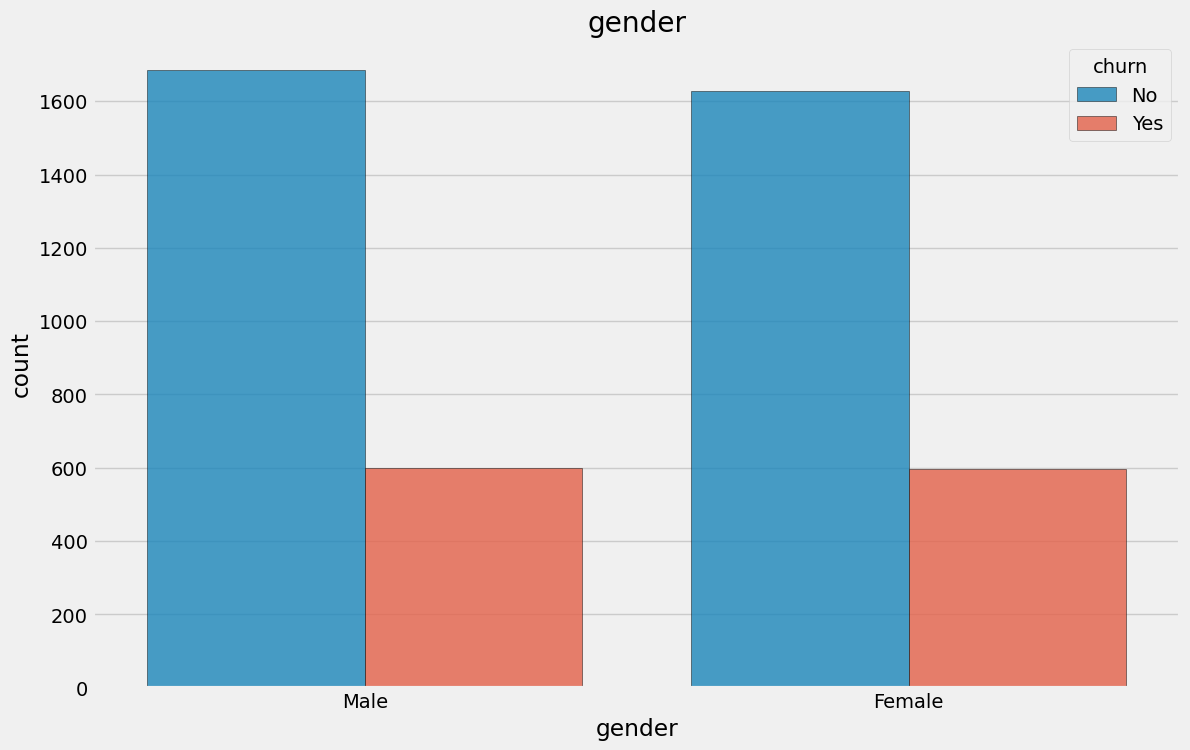

-------------------------------------------------------------


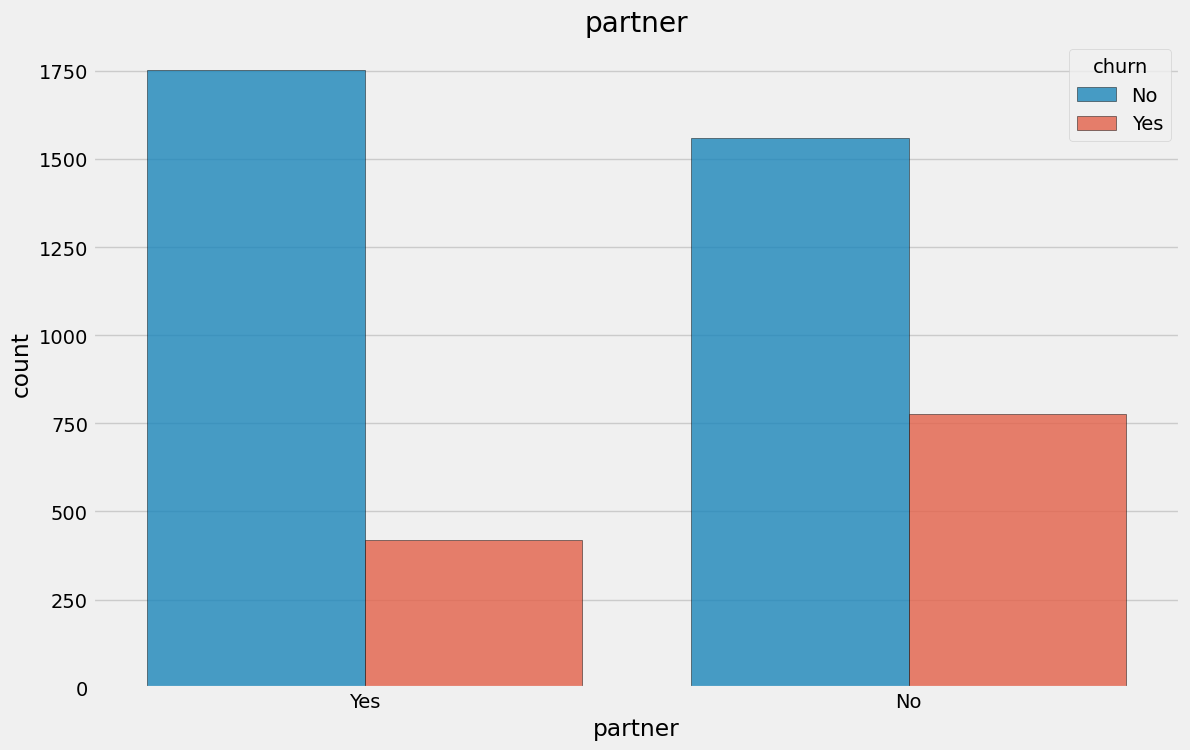

-------------------------------------------------------------


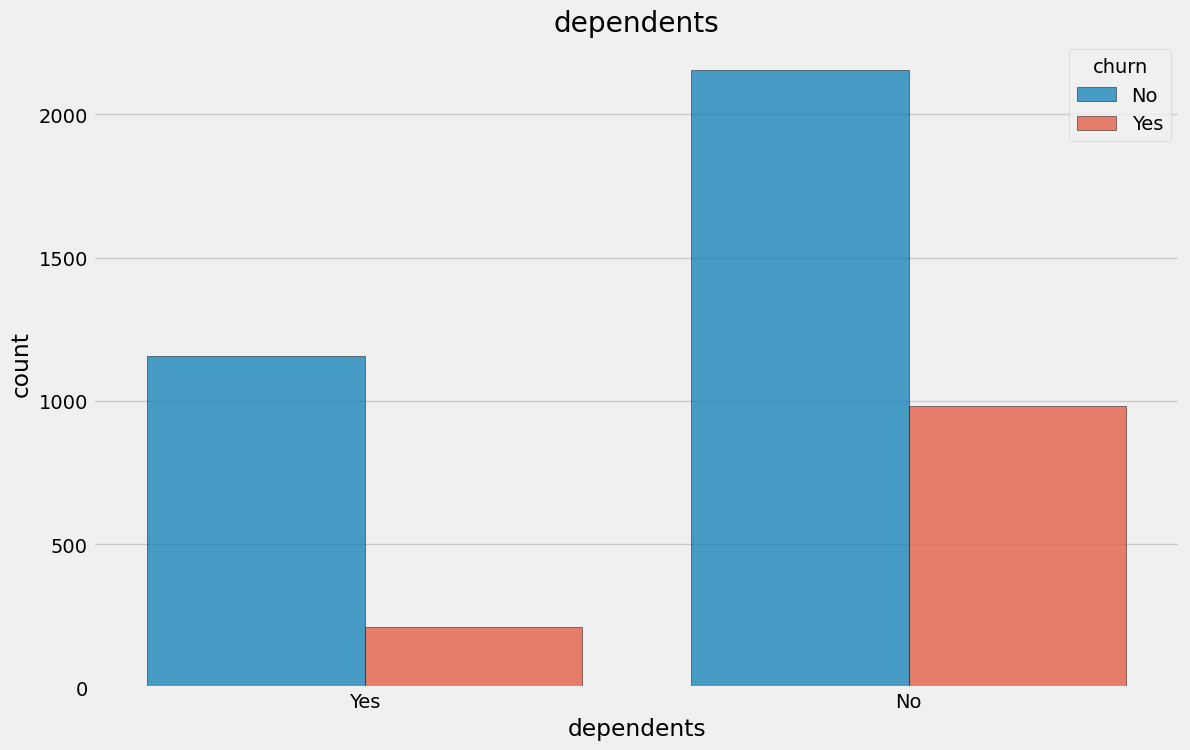

-------------------------------------------------------------


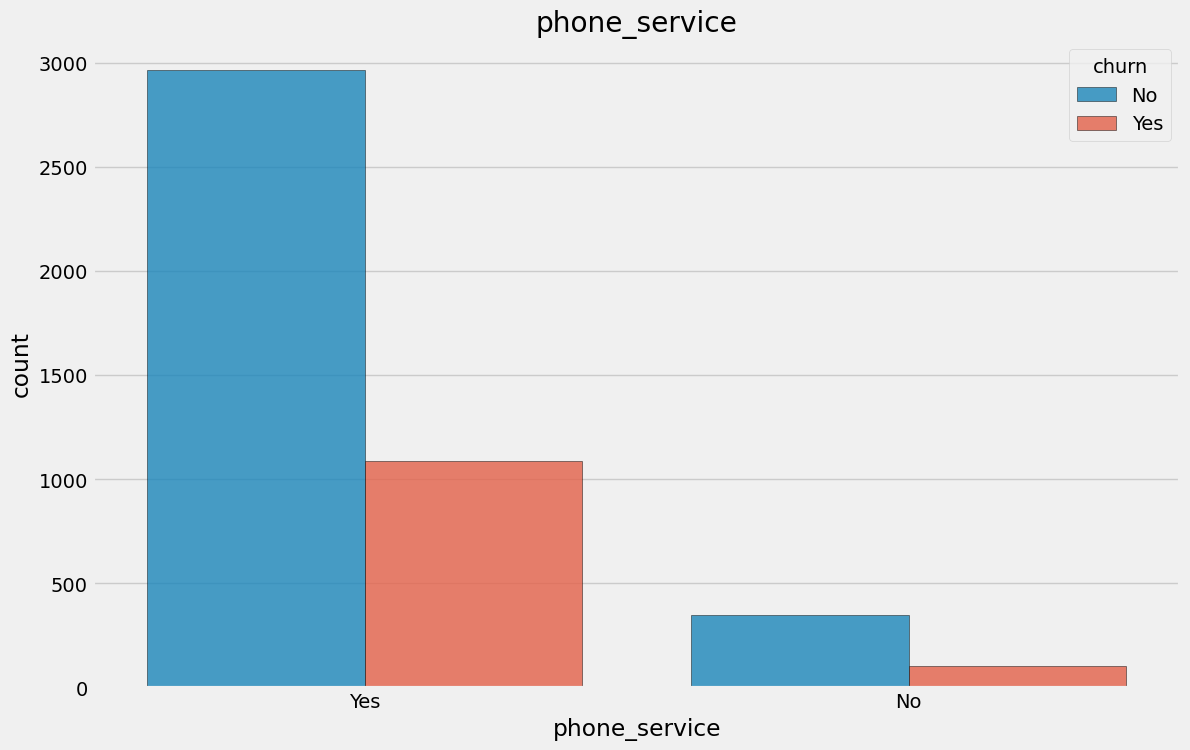

-------------------------------------------------------------


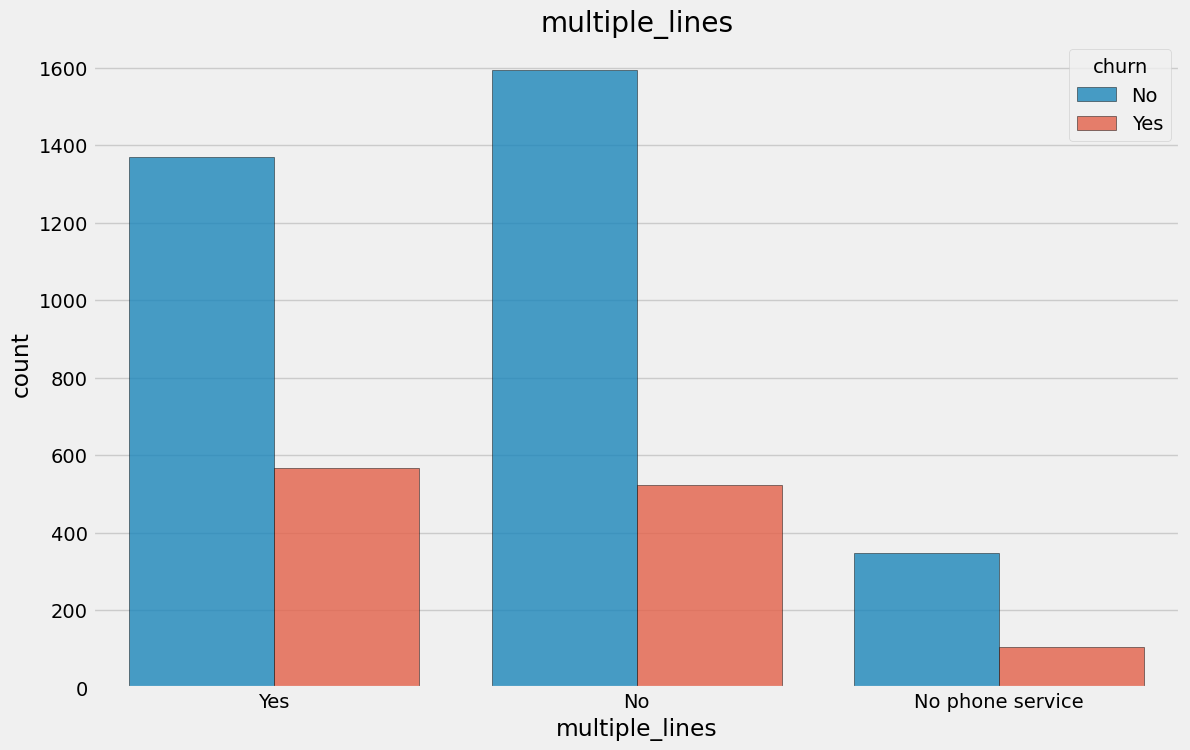

-------------------------------------------------------------


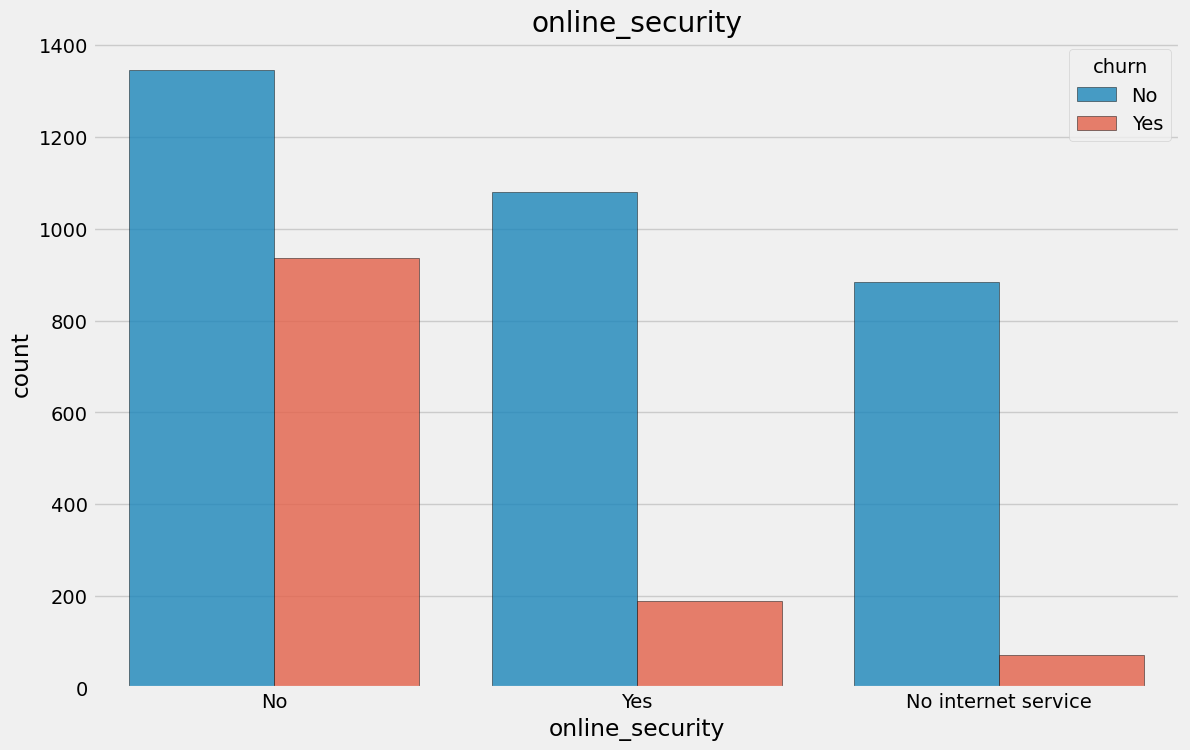

-------------------------------------------------------------


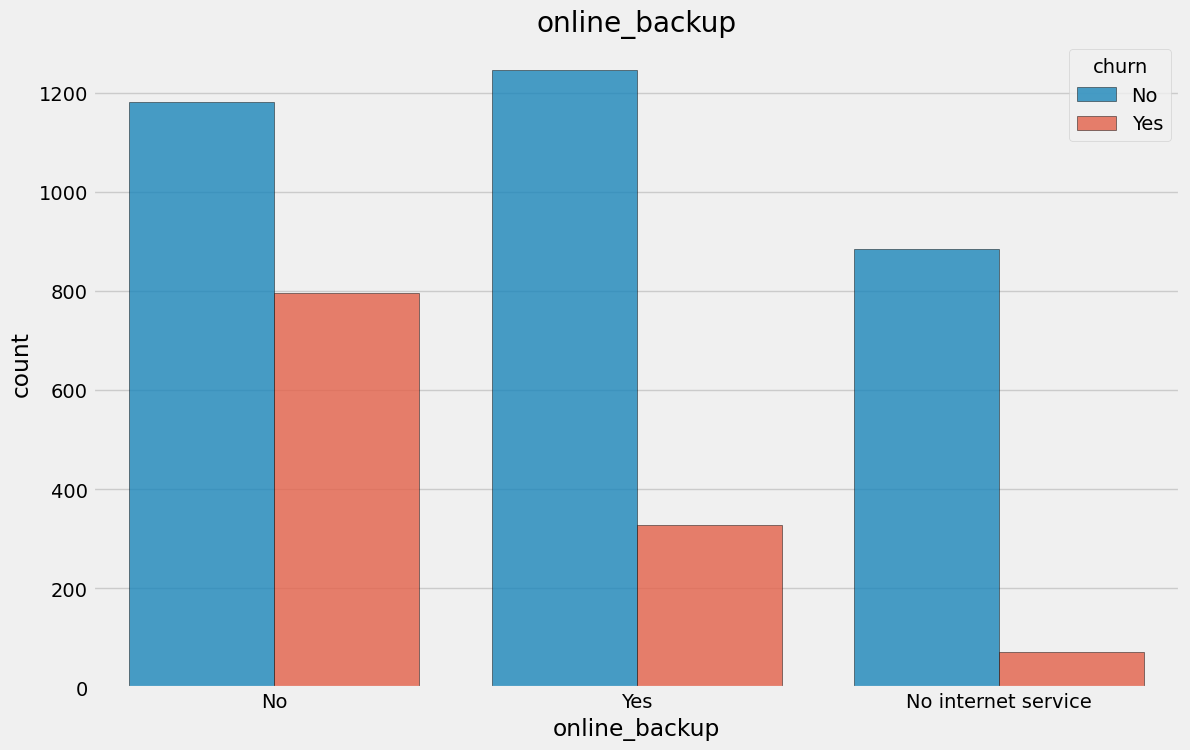

-------------------------------------------------------------


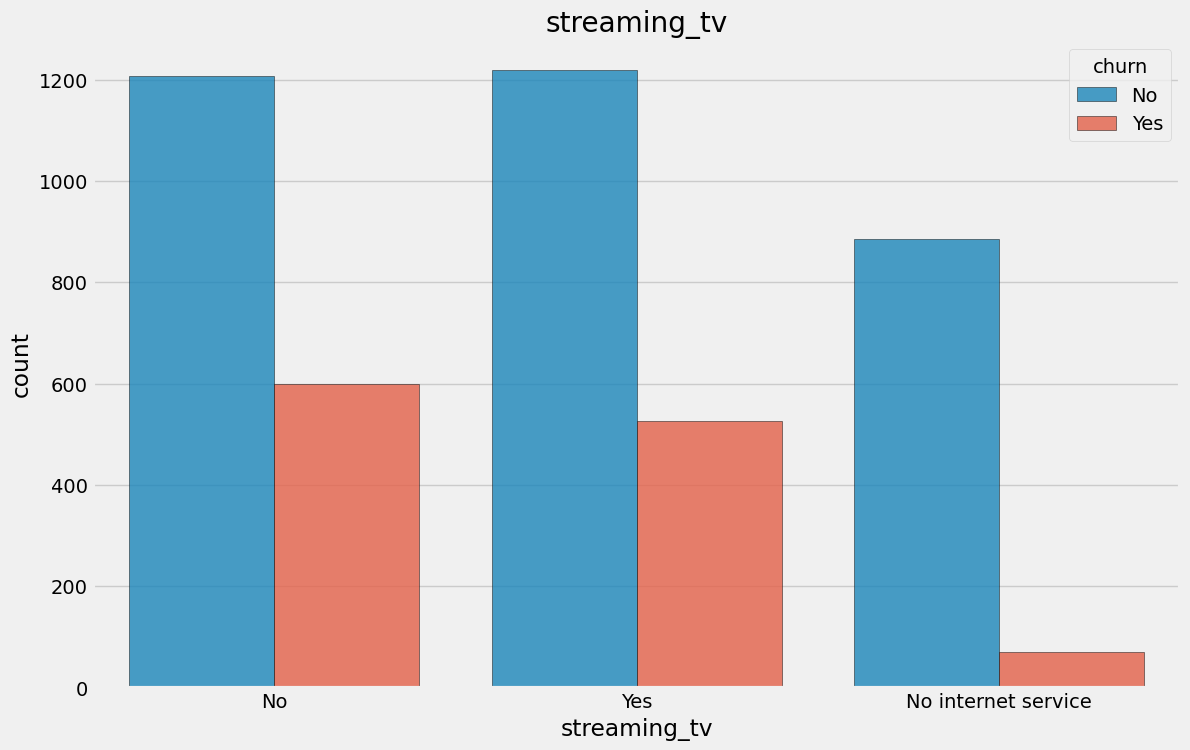

-------------------------------------------------------------


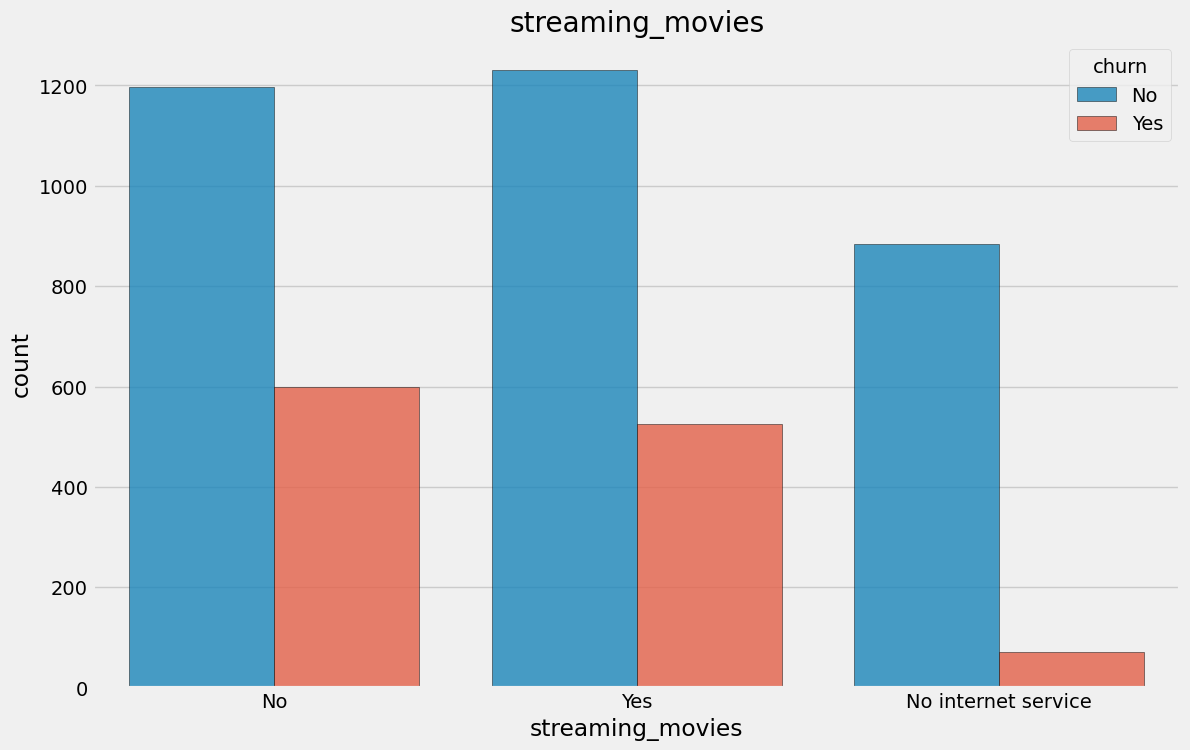

-------------------------------------------------------------


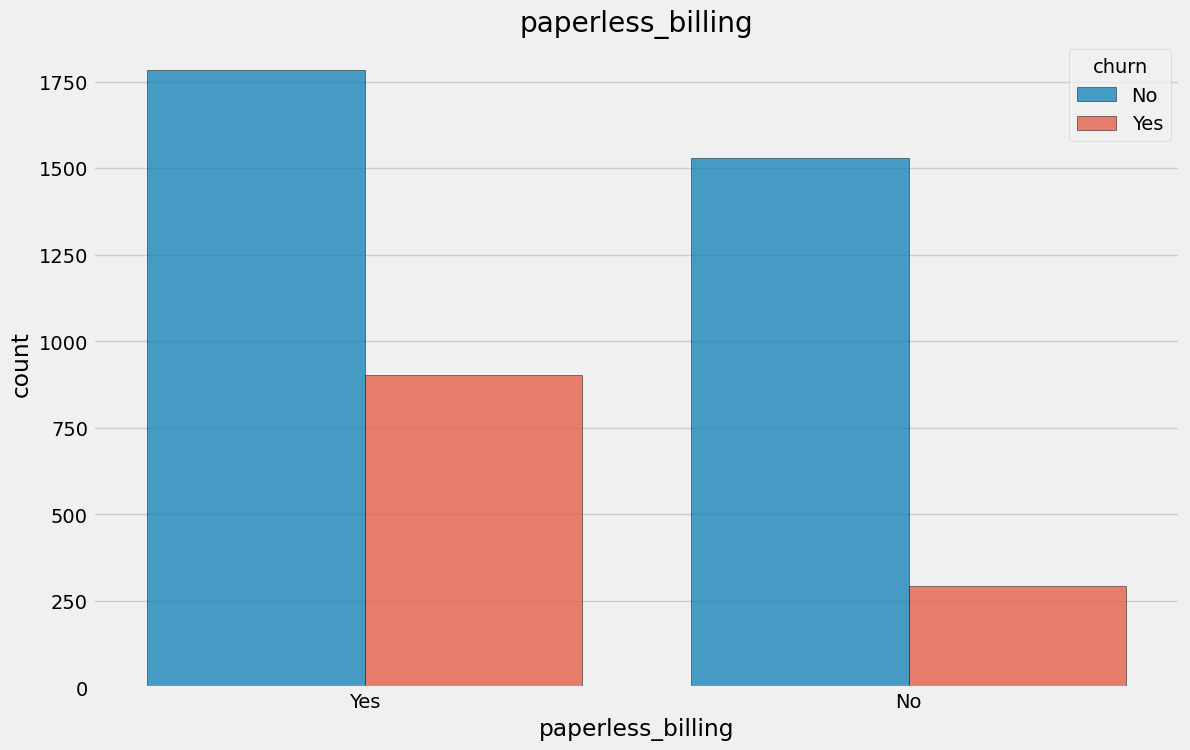

-------------------------------------------------------------


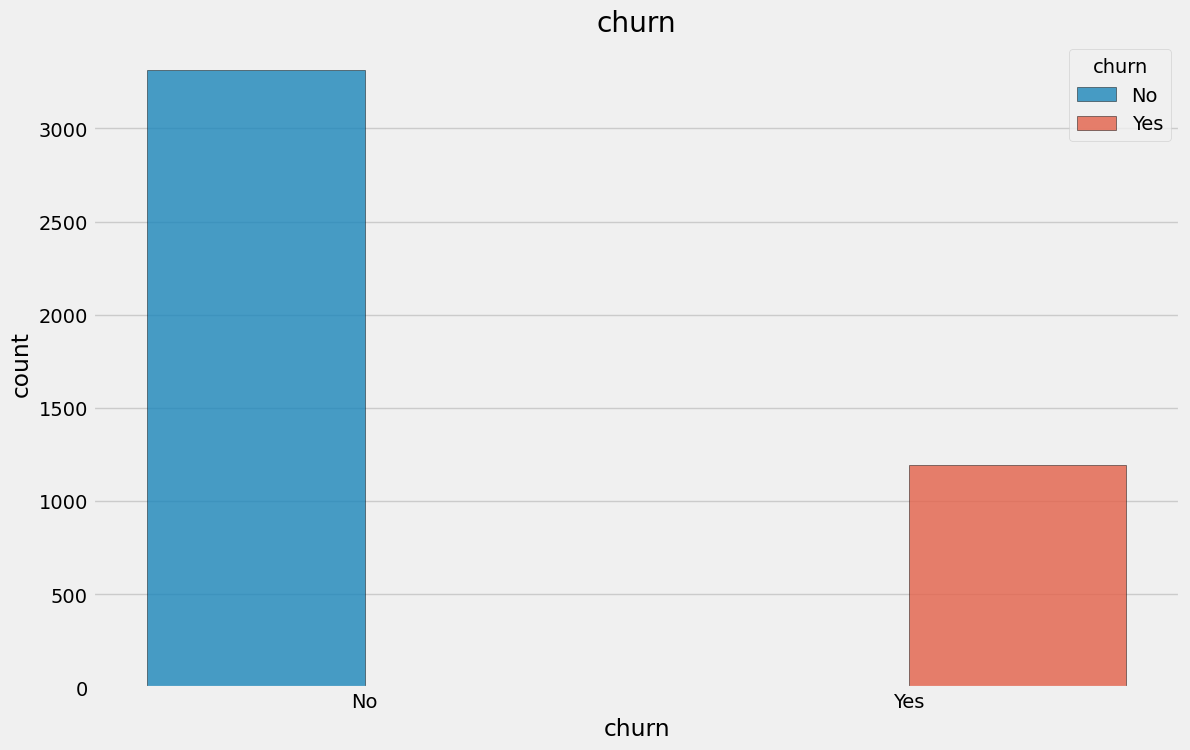

-------------------------------------------------------------


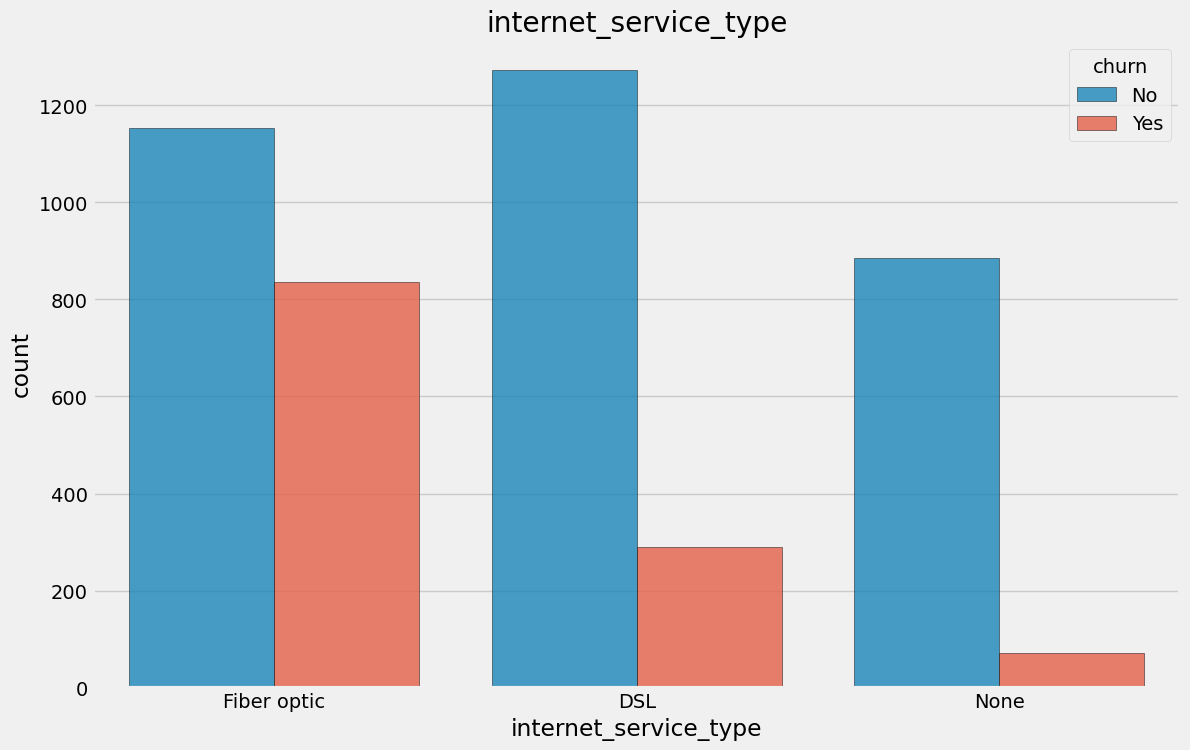

-------------------------------------------------------------


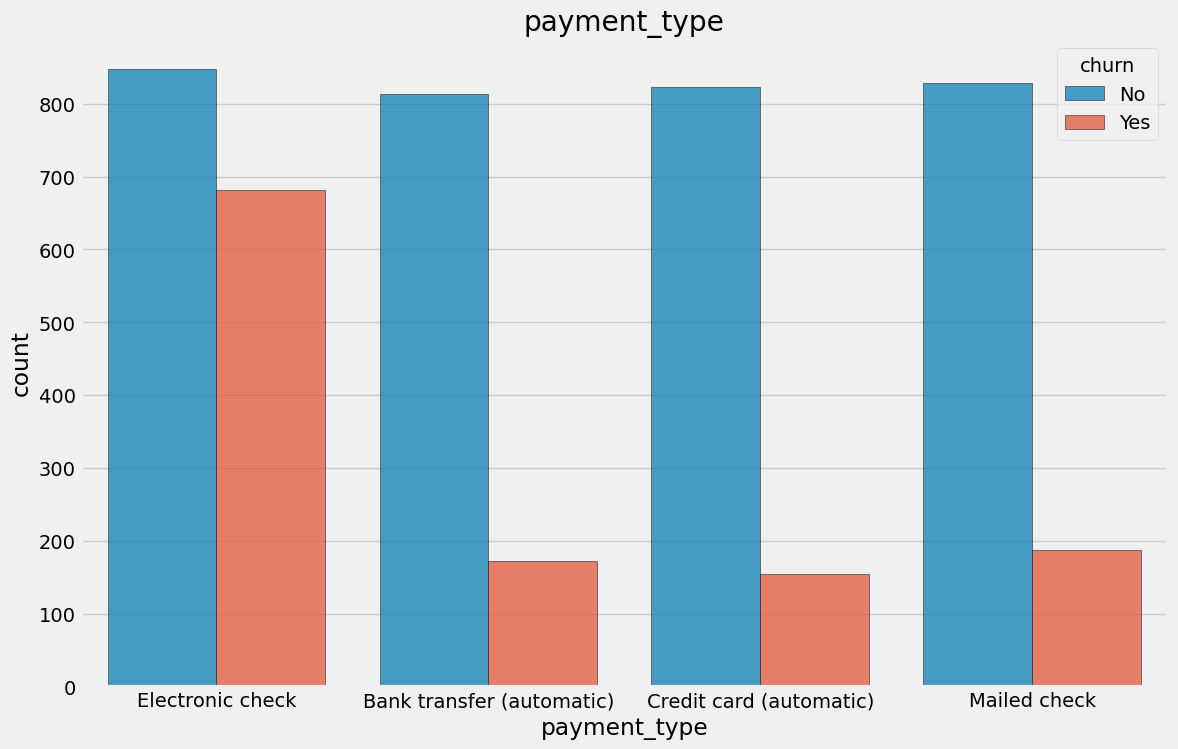

-------------------------------------------------------------


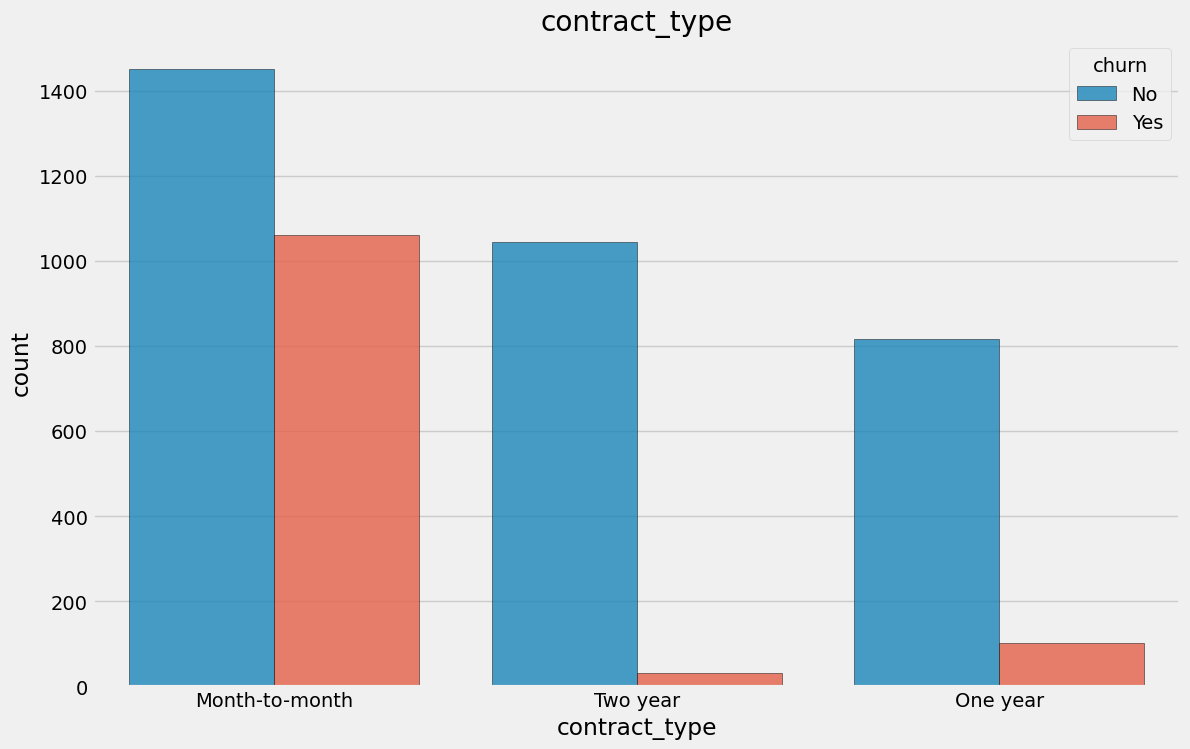

-------------------------------------------------------------


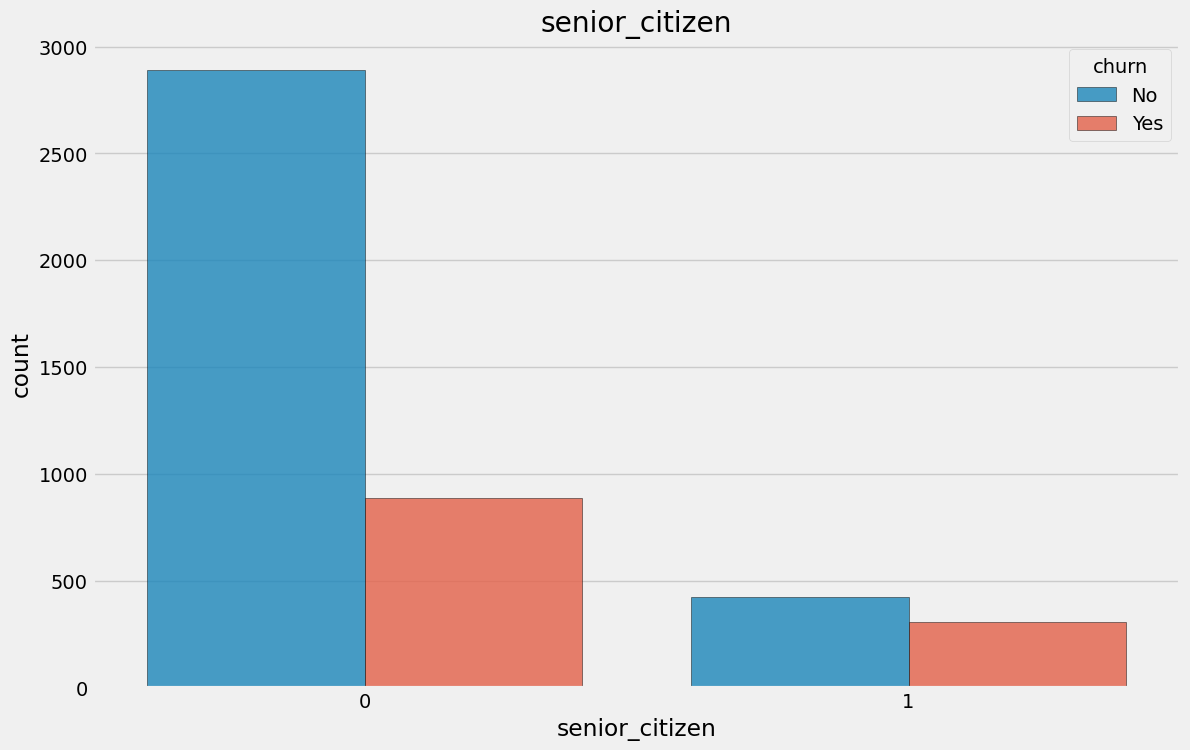

-------------------------------------------------------------


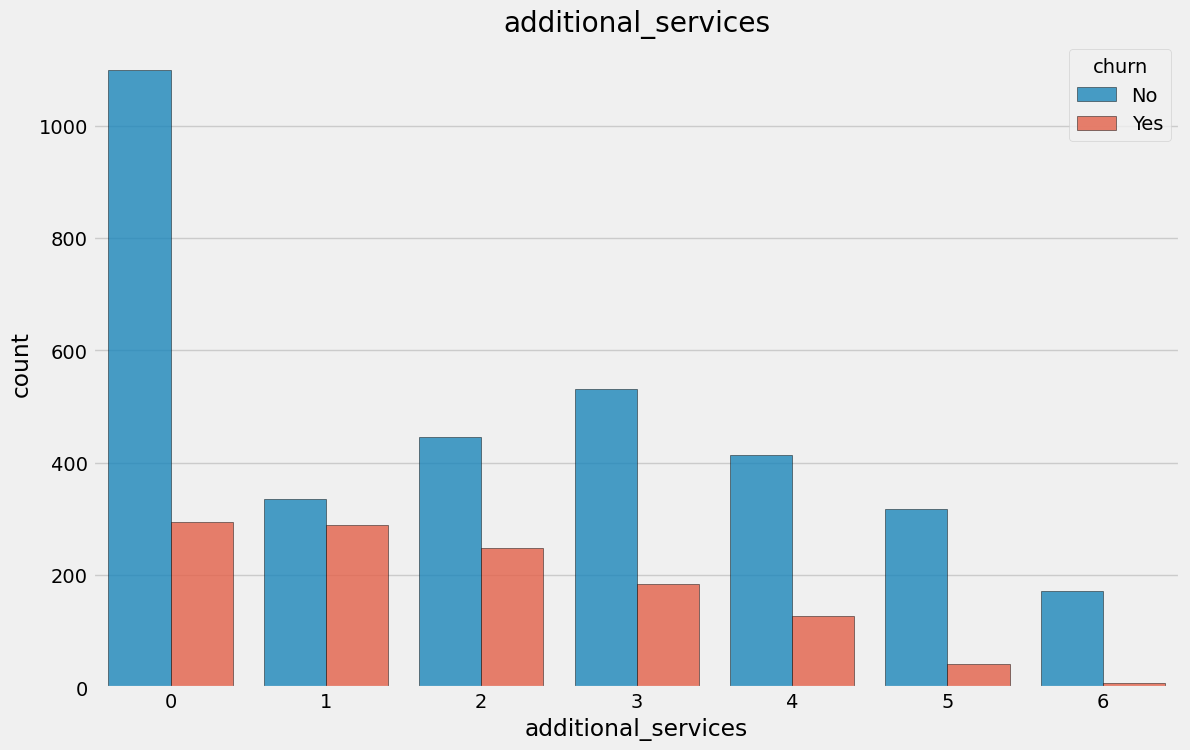

-------------------------------------------------------------


In [15]:
# Function to loop through desired df and respective columns to visualize 
m.check_cat_distribution(cat_cols)

In [16]:
# Observed irregular distributions in phone_service so conducting
# statistical analysis on churn x phone_service

**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between churn & phone service\
Null $H_a$: There *is* an association between churn & phone service

In [17]:
m. chi2_test(train['churn'],train['phone_service'])

We fail to reject the null hypothesis with a p-score of: {0.11722043938362048}


phone_service,No,Yes
churn,,
No,348,2963
Yes,106,1090


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between churn & senior citizens\
Null $H_a$: There *is* an association between churn & senior citizens

In [18]:
m.chi2_test(train['churn'],train['senior_citizen'])

We can reject the null hypothesis with a p-score of: {2.7803174215206096e-25}


senior_citizen,0,1
churn,,
No,2888,423
Yes,888,308


## Explore: Continious Distributions

In [19]:
# compiling continious columns
num_cols = train[num_cols]

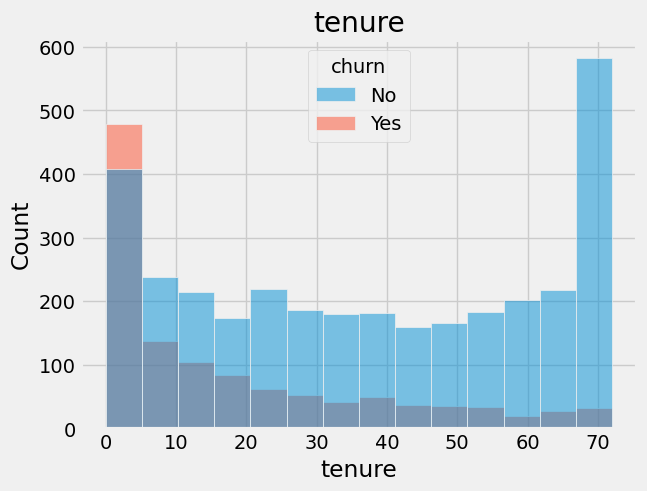

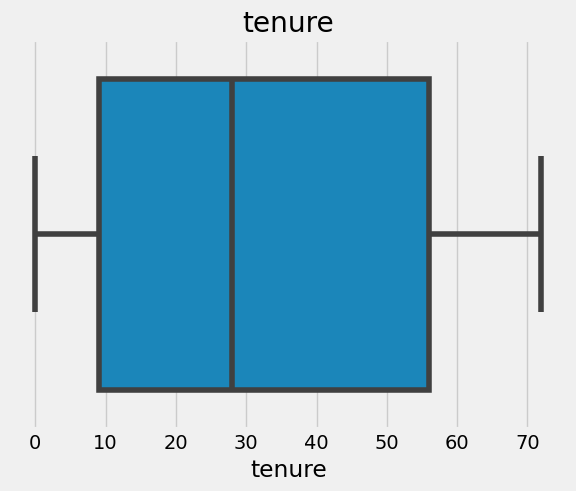

-------------------------------------------------------------


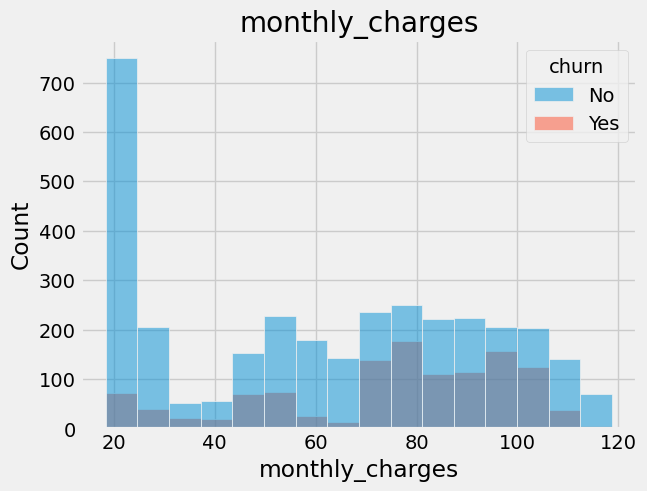

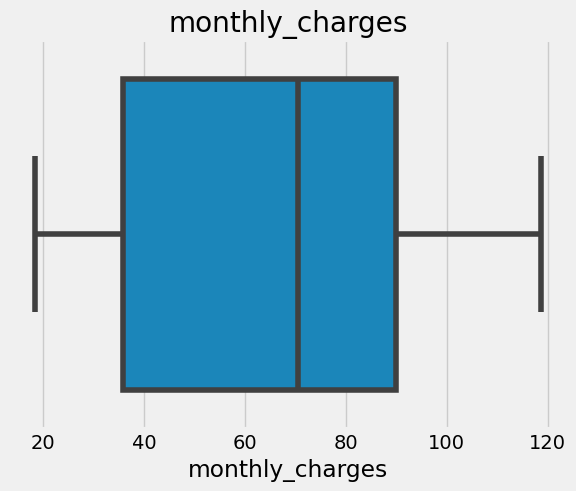

-------------------------------------------------------------


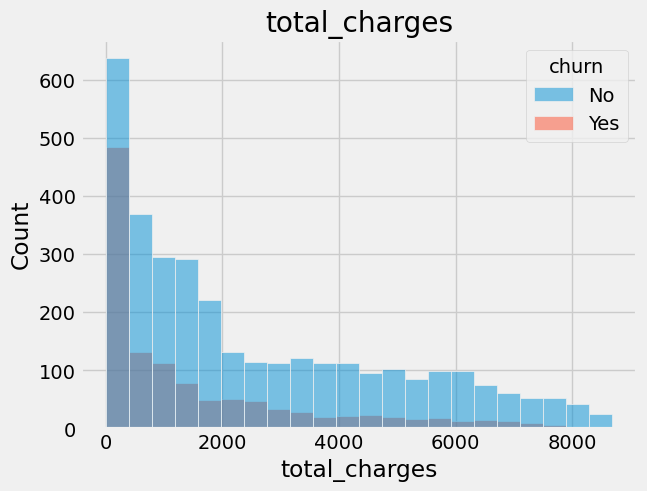

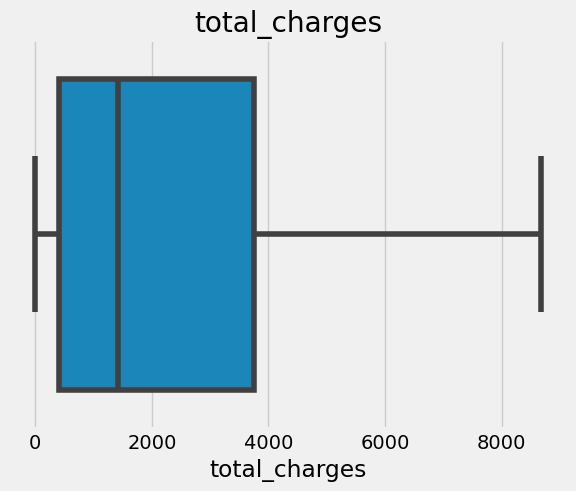

-------------------------------------------------------------


In [20]:
# Loop through respective df and column
m.check_num_distribution(num_cols,dataset=train)

#### A negative correlation between tenure and churn can be observed

## Explore: Correlations with Similar Data

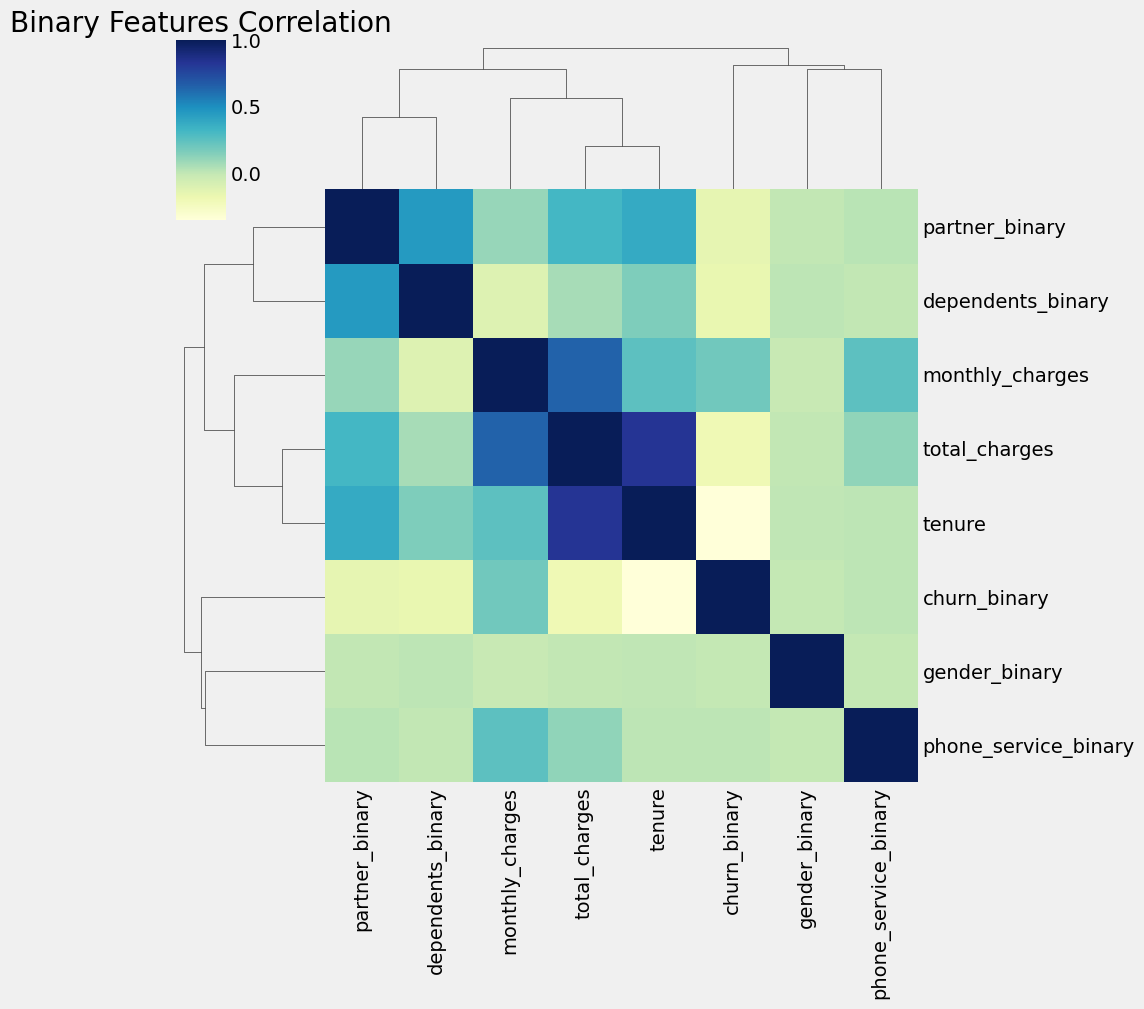

In [21]:
# Clustering correlation grid comparison

# Exploring binary categorical data as well as our two continious values -- total_charges & monthly_charges
telco_grid = telco[['churn_binary','gender_binary','partner_binary','dependents_binary','phone_service_binary'\
    ,'total_charges','monthly_charges','tenure']]
sns_plot = sns.clustermap(telco_grid.corr(),cmap = 'YlGnBu')
plt.title('Binary Features Correlation')
plt.show()

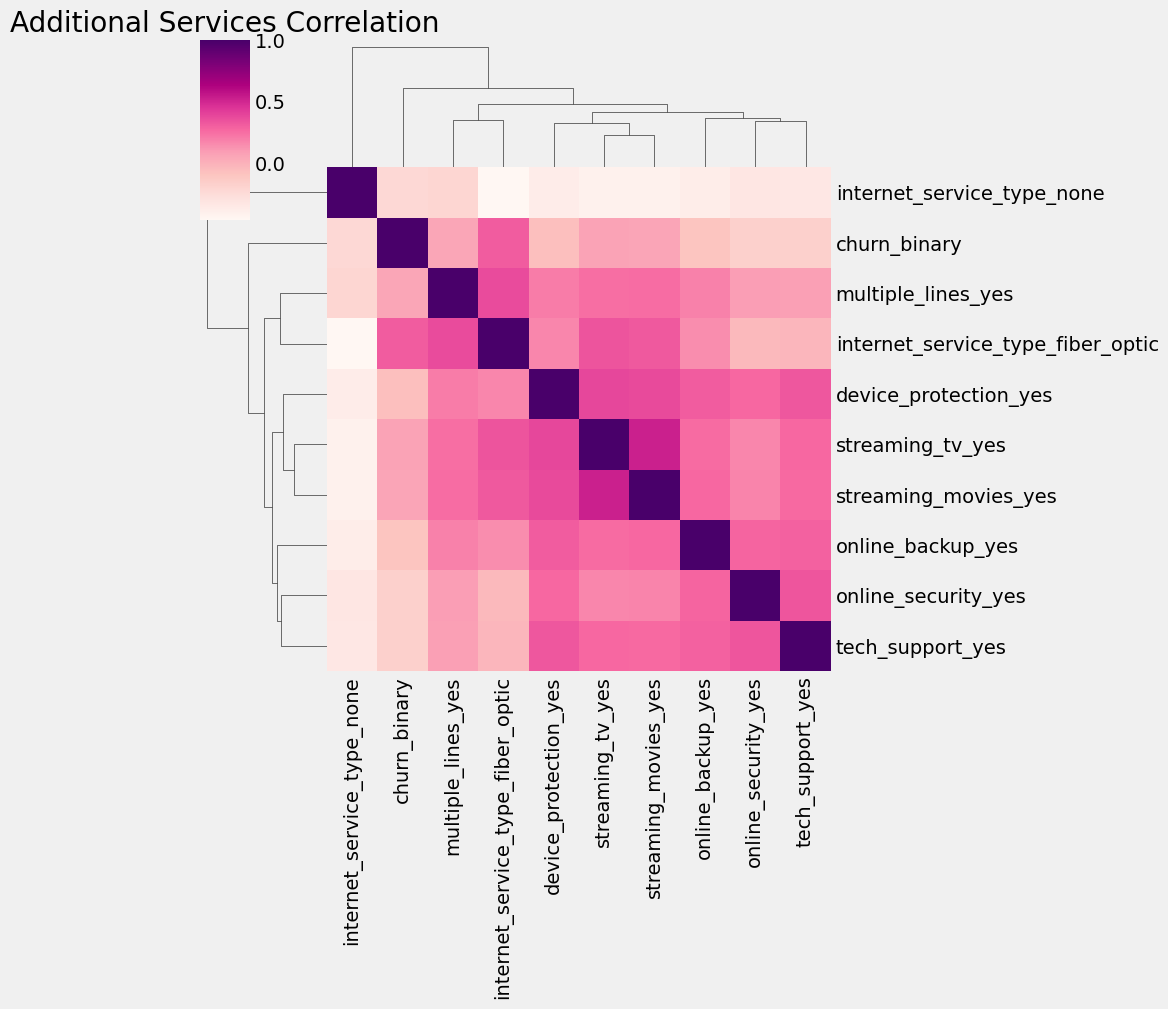

In [22]:
# Clustering correlation grid comparing

# Exploring multicategorical data that is also association as our 'additional services' provided by telco

telco_services = train[['churn_binary','multiple_lines_yes','online_security_yes','online_backup_yes','tech_support_yes','streaming_tv_yes',\
                        'streaming_movies_yes','device_protection_yes','internet_service_type_fiber_optic','internet_service_type_none']]
sns_plot = sns.clustermap(telco_services.corr(),cmap = 'RdPu')
plt.title('Additional Services Correlation')
plt.show()

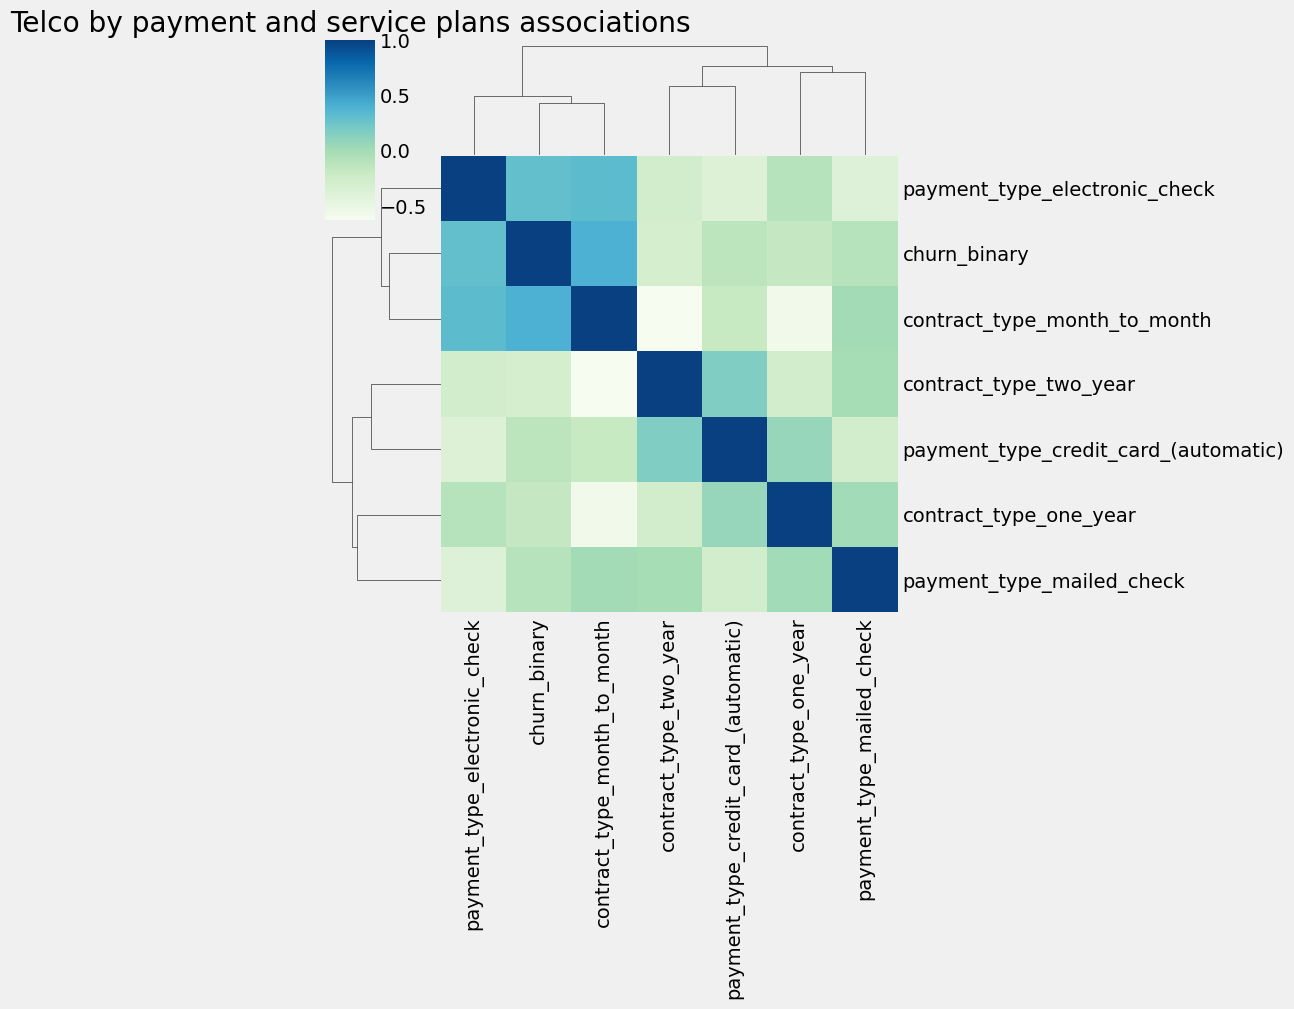

In [23]:
telco_plans = train[['churn_binary','contract_type_month_to_month','contract_type_two_year',
'contract_type_one_year','payment_type_mailed_check','payment_type_electronic_check',
'payment_type_credit_card_(automatic)']]
sns_plot = sns.clustermap(telco_plans.corr(),cmap = 'GnBu')
plt.title('Telco by payment and service plans associations')
plt.show()


## Correlation grids help strengthen previous hunches and allow for a better assessment on feature testing
- ### Slight correlation between churn_binary and payment_type_electronic_check
- ### Stronger correlation between churn_binary and contract_type_month_to_month
- ### Negative correlation between churn_binary and tenure
- ### Slight correlation between churn_binary and monthly_charges
- ### Slight correlation between churn_binary and internet_service_type_fiber_optic

**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & having a *month-to-month contract*\
Null $H_a$: There *is* an association between *churn* & having a *month-to-month contract*

In [24]:
# conduct statistical analysis of churn x contract_type_month_to_month
m.chi2_test(train['churn_binary'],train['contract_type_month_to_month'])

We can reject the null hypothesis with a p-score of: {7.035284556920665e-158}


contract_type_month_to_month,0,1
churn_binary,,
0,1861,1450
1,135,1061


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *payment_type_electronic_check*\
Null $H_a$: There *is* an association between *churn* & *payment_type_electronic_check*

In [25]:
m.chi2_test(train['churn_binary'],train['payment_type_electronic_check'])

We can reject the null hypothesis with a p-score of: {1.5447802156582827e-85}


payment_type_electronic_check,0,1
churn_binary,,
0,2464,847
1,515,681


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *internet_service_type_fiber_optic*\
Null $H_a$: There *is* an association between *churn* & *internet_service_type_fiber_optic*

In [26]:
m.chi2_test(train['churn_binary'],train['internet_service_type_fiber_optic'])

We can reject the null hypothesis with a p-score of: {1.9919197608136183e-96}


internet_service_type_fiber_optic,0,1
churn_binary,,
0,2157,1154
1,361,835


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *monthly_charges*\
Null $H_a$: There *is* an association between *churn* & *monthly_charges*

In [27]:
train.groupby('churn')['monthly_charges'].mean()

monthly_churned = train[train.churn == 'Yes']['monthly_charges']
monthly_nochurn = train[train.churn == 'No']['monthly_charges']


In [28]:
# Set alpha
α = .05
# Assuming equal variance
t_stat, p = stats.ttest_ind(monthly_churned,monthly_nochurn,equal_var=True)
p

m.check_p(p)

We can reject the null hypothesis with a p-score of: {1.481195740841378e-40}


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *tenure*\
Null $H_a$: There *is* an association between *churn* & *tenure*

In [29]:
tenure_churned = train[train.churn == 'Yes']['tenure']
tenure_nochurn = train[train.churn == 'No']['tenure']

In [30]:
# Set alpha
α = .05
# Assuming equal variance
t_stat, p = stats.ttest_ind(tenure_churned,tenure_nochurn,equal_var=True)
p

m.check_p(p)

We can reject the null hypothesis with a p-score of: {5.213539721523729e-130}


# Modeling

## Features Selected
___
- continious - monthly_charges
- continious - tenure
- categorical - contract_type_month_to_month
- categorical - payment_type_electronic_check
- categorical - internet_service_type_fiber_optic
- categorical - senior_citizen_binary

## Determining Baseline

In [31]:
train['churn_binary'].value_counts()
baseline_accuracy = (train.churn_binary == 0).mean()
baseline_accuracy.round(3)

0.735

## Model 1: Logistic Regression

## Fit & Train

In [32]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'partner_binary', 'dependents_binary',
       'phone_service_binary', 'gender_binary', 'paperless_billing_binary',
       'churn_binary', 'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_yes', 'online_backup_yes',
       'payment_type_credit_card_(automatic)', 'payment_type_electronic_check',
       'payment_type_mailed_check', 'contract_type_one_year',
       'contract_type_two_year', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'device_protection_yes',
       'internet_serv

In [33]:
x_train = train[['monthly_charges','tenure','contract_type_month_to_month','internet_service_type_fiber_optic','senior_citizen']]
y_train = train['churn_binary']
y_train = y_train.values.ravel()

x_val = validate[['monthly_charges','tenure','contract_type_month_to_month','internet_service_type_fiber_optic','senior_citizen']]
y_val = validate['churn_binary']
y_val = y_val.values.ravel()

x_test = test[['monthly_charges','tenure','contract_type_month_to_month','internet_service_type_fiber_optic','senior_citizen']]
y_test = test['churn_binary']
y_test = y_test.values.ravel()

In [34]:
logit = lr(C=.3, random_state=4343)

In [35]:
logit.fit(x_train,y_train)

LogisticRegression(C=0.3, random_state=4343)

In [36]:
model1_prediction = logit.predict(x_train)
model1_probability = logit.predict_proba(x_train)

model1_prediction_val = logit.predict(x_val)
model1_probability_val = logit.predict_proba(x_val)

model1_prediction_test = logit.predict(x_test)
model1_probability_test = logit.predict_proba(x_test)

## Model 1: Evaluation

### Model 1: Confusion Matrix

In [60]:
cm = confusion_matrix(y_train,model1_prediction)
cm_disp = ConfusionMatrixDisplay(cm,display_labels=logit.classes_)
cm

array([[2985,  326],
       [ 603,  593]])

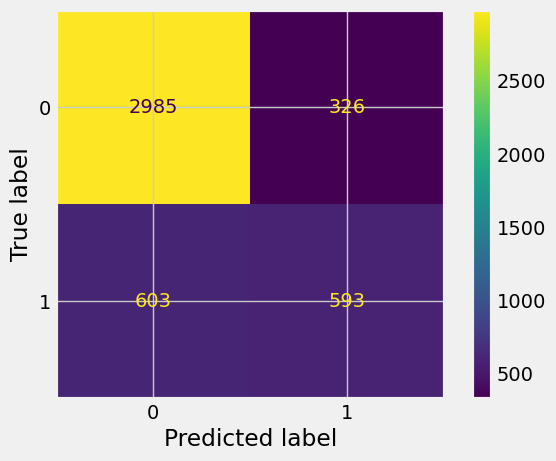

In [38]:
cm_disp.plot()
plt.show()

### Model 1: Classification Report & Metrics

In [39]:
TN, FP, FN, TP = confusion_matrix(y_train, model1_prediction).ravel()
m.get_classification_report(y_train,model1_prediction,)

,precision,recall,f1-score,support
0,0.831940,0.901540,0.865343,3311.000000
accuracy,0.793876,0.793876,0.793876,0.793876
weighted avg,0.782403,0.793876,0.784516,4507.000000
macro avg,0.738603,0.698680,0.713050,4507.000000
1,0.645267,0.495819,0.560757,1196.000000


In [40]:
m.metrics(TN, FP, FN, TP)

Accuracy: 0.7938761925893055

True Positive Rate/Sensitivity/Recall/Power: 0.49581939799331104
False Positive Rate/False Alarm Ratio/Fall-out: 0.0984596798550287
True Negative Rate/Specificity/Selectivity: 0.9015403201449713
False Negative Rate/Miss Rate: 0.504180602006689

Precision/PPV: 0.6452665941240479
F1 Score: 0.5607565011820331

Support (0): 1196
Support (1): 3311


## Model 1: Metrics for Validate & Test

In [41]:
TN, FP, FN, TP = confusion_matrix(y_val, model1_prediction_val).ravel()
print(classification_report(y_val,model1_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test, model1_prediction_test).ravel()
m.get_classification_report(y_test,model1_prediction_test)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       828
           1       0.65      0.48      0.56       299

    accuracy                           0.80      1127
   macro avg       0.74      0.70      0.71      1127
weighted avg       0.78      0.80      0.78      1127



,precision,recall,f1-score,support
0,0.826432,0.906280,0.864516,1035.000000
accuracy,0.791341,0.791341,0.791341,0.791341
weighted avg,0.778535,0.791341,0.780049,1409.000000
macro avg,0.736209,0.689771,0.705406,1409.000000
1,0.645985,0.473262,0.546296,374.000000


In [42]:
m.log_regression_compiled(x_train,y_train,x_test,y_test)

Best fit "C" parameter (Determined by GridSearchCV): 0.2
Accuracy: 0.7934324384291103

True Positive Rate/Sensitivity/Recall/Power: 0.49414715719063546
False Positive Rate/False Alarm Ratio/Fall-out: 0.0984596798550287
True Negative Rate/Specificity/Selectivity: 0.9015403201449713
False Negative Rate/Miss Rate: 0.5058528428093646

Precision/PPV: 0.6444929116684842
F1 Score: 0.5593942262186465

Support (0): 1196
Support (1): 3311


## Model 1: Logistic Regression Hypertuning for Best Parameters

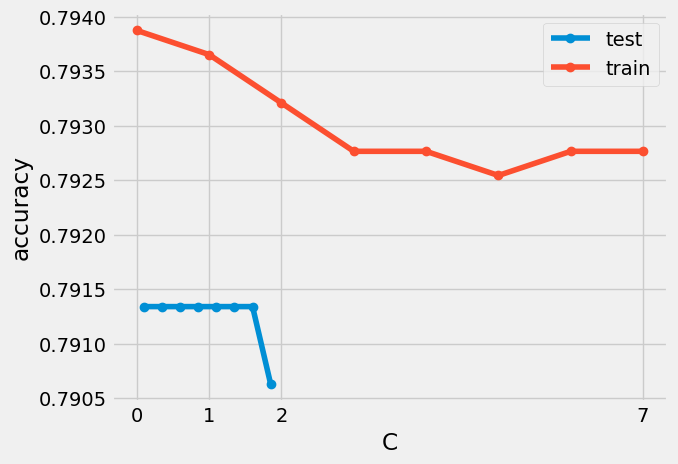

In [43]:
c_range = np.arange(.1, 2, .25)
train_scores = []
test_scores = []
for c in c_range:
    logit_chart = lr(C = c,random_state=4343)
    logit_chart.fit(x_train, y_train)
    train_scores.append(logit_chart.score(x_train, y_train))
    test_scores.append(logit_chart.score(x_test, y_test))
plt.figure()
plt.xlabel('C')
plt.ylabel('accuracy')
plt.plot(c_range, test_scores,'o-',train_scores,'o-')
plt.legend(['test','train'])
plt.xticks([0,1,2,7])
plt.show()

## Evaluation of Logistic Regression

## Model 1: Logistic Regression Evaluated
### Accuracy
---
- Baseline: .735
- Train: .79
- Validate: .80
- Test: .79



With a train accuracy of .79 and 

## Model 1: Decision Tree

In [44]:
clf = dt(max_depth=3,random_state=4343)

In [45]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=4343)

In [46]:
model2_prediction = clf.predict(x_train)
model2_probability = clf.predict_proba(x_train)

model2_prediction_val = clf.predict(x_val)
model2_probability_val = clf.predict_proba(x_val)

model2_prediction_test = clf.predict(x_test)
model2_probability_test = clf.predict_proba(x_test)

In [47]:
TN, FP, FN, TP = confusion_matrix(y_train, model2_prediction).ravel()
m.get_classification_report(y_train,model2_prediction)

,precision,recall,f1-score,support
0,0.811842,0.931743,0.867670,3311.000000
accuracy,0.791214,0.791214,0.791214,0.791214
weighted avg,0.776946,0.791214,0.771567,4507.000000
macro avg,0.746091,0.666958,0.686594,4507.000000
1,0.680339,0.402174,0.505518,1196.000000


In [48]:
m.metrics(TN, FP, FN, TP)

Accuracy: 0.791213667628134

True Positive Rate/Sensitivity/Recall/Power: 0.40217391304347827
False Positive Rate/False Alarm Ratio/Fall-out: 0.06825732407127756
True Negative Rate/Specificity/Selectivity: 0.9317426759287224
False Negative Rate/Miss Rate: 0.5978260869565217

Precision/PPV: 0.6803394625176803
F1 Score: 0.5055176037834996

Support (0): 1196
Support (1): 3311


## Model 1: Validate & Test

In [49]:
TN, FP, FN, TP = confusion_matrix(y_val, model2_prediction_val).ravel()
print(classification_report(y_val,model2_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test, model2_prediction_test).ravel()
m.get_classification_report(y_test,model2_prediction_test)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       828
           1       0.69      0.41      0.52       299

    accuracy                           0.80      1127
   macro avg       0.75      0.67      0.69      1127
weighted avg       0.78      0.80      0.78      1127



,precision,recall,f1-score,support
0,0.812183,0.927536,0.866035,1035.000000
accuracy,0.789212,0.789212,0.789212,0.789212
weighted avg,0.774337,0.789212,0.770422,1409.000000
macro avg,0.740893,0.666977,0.685929,1409.000000
1,0.669604,0.406417,0.505824,374.000000


## Decision Tree Plotted

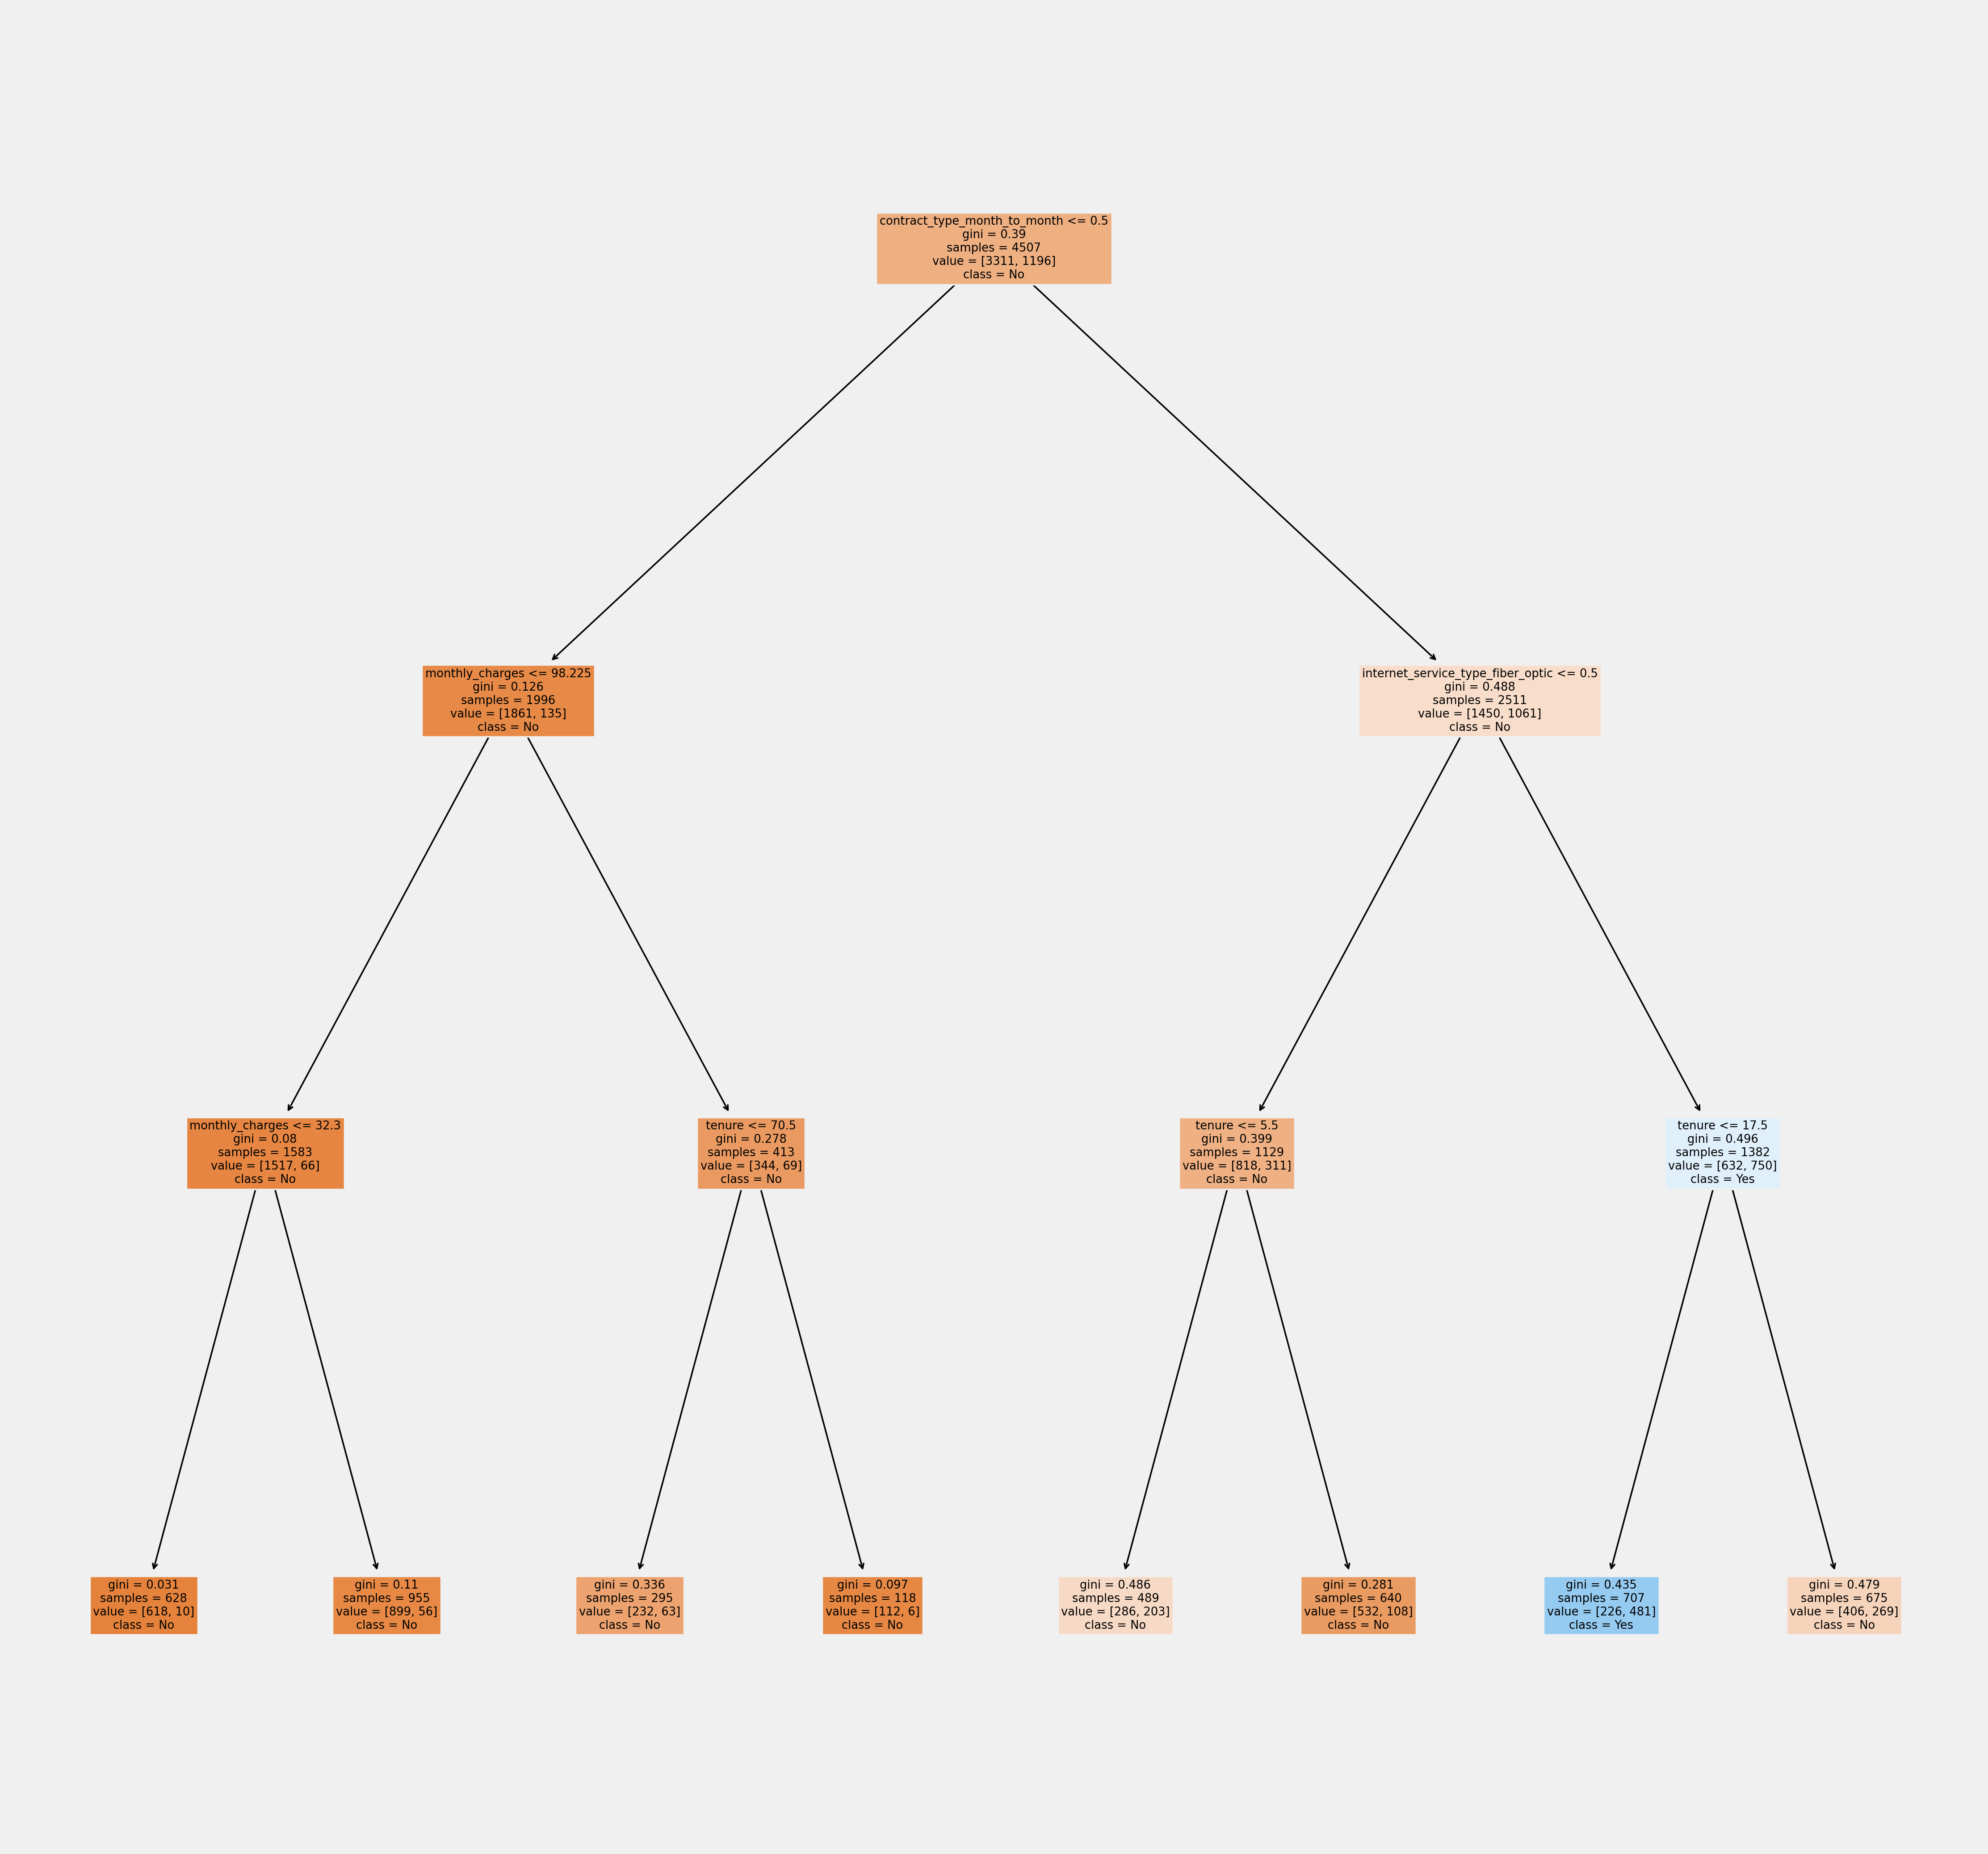

In [50]:
# Plot Tree Model 1
# Change __ to unique options of 
labels = list(train['churn'].astype(str))
#plt.figure(figsize=(30,30),dpi=50)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)
plot_tree(clf, feature_names=x_train.columns.to_list(), class_names=labels,filled=True)
plt.show()

Accuracy: 0.791213667628134

True Positive Rate/Sensitivity/Recall/Power: 0.40217391304347827
False Positive Rate/False Alarm Ratio/Fall-out: 0.06825732407127756
True Negative Rate/Specificity/Selectivity: 0.9317426759287224
False Negative Rate/Miss Rate: 0.5978260869565217

Precision/PPV: 0.6803394625176803
F1 Score: 0.5055176037834996

Support (0): 1196
Support (1): 3311


Accuracy: 0.7877927608232789

True Positive Rate/Sensitivity/Recall/Power: 0.29411764705882354
False Positive Rate/False Alarm Ratio/Fall-out: 0.033816425120772944
True Negative Rate/Specificity/Selectivity: 0.966183574879227
False Negative Rate/Miss Rate: 0.7058823529411765

Precision/PPV: 0.7586206896551724
F1 Score: 0.4238921001926782

Support (0): 374
Support (1): 1035


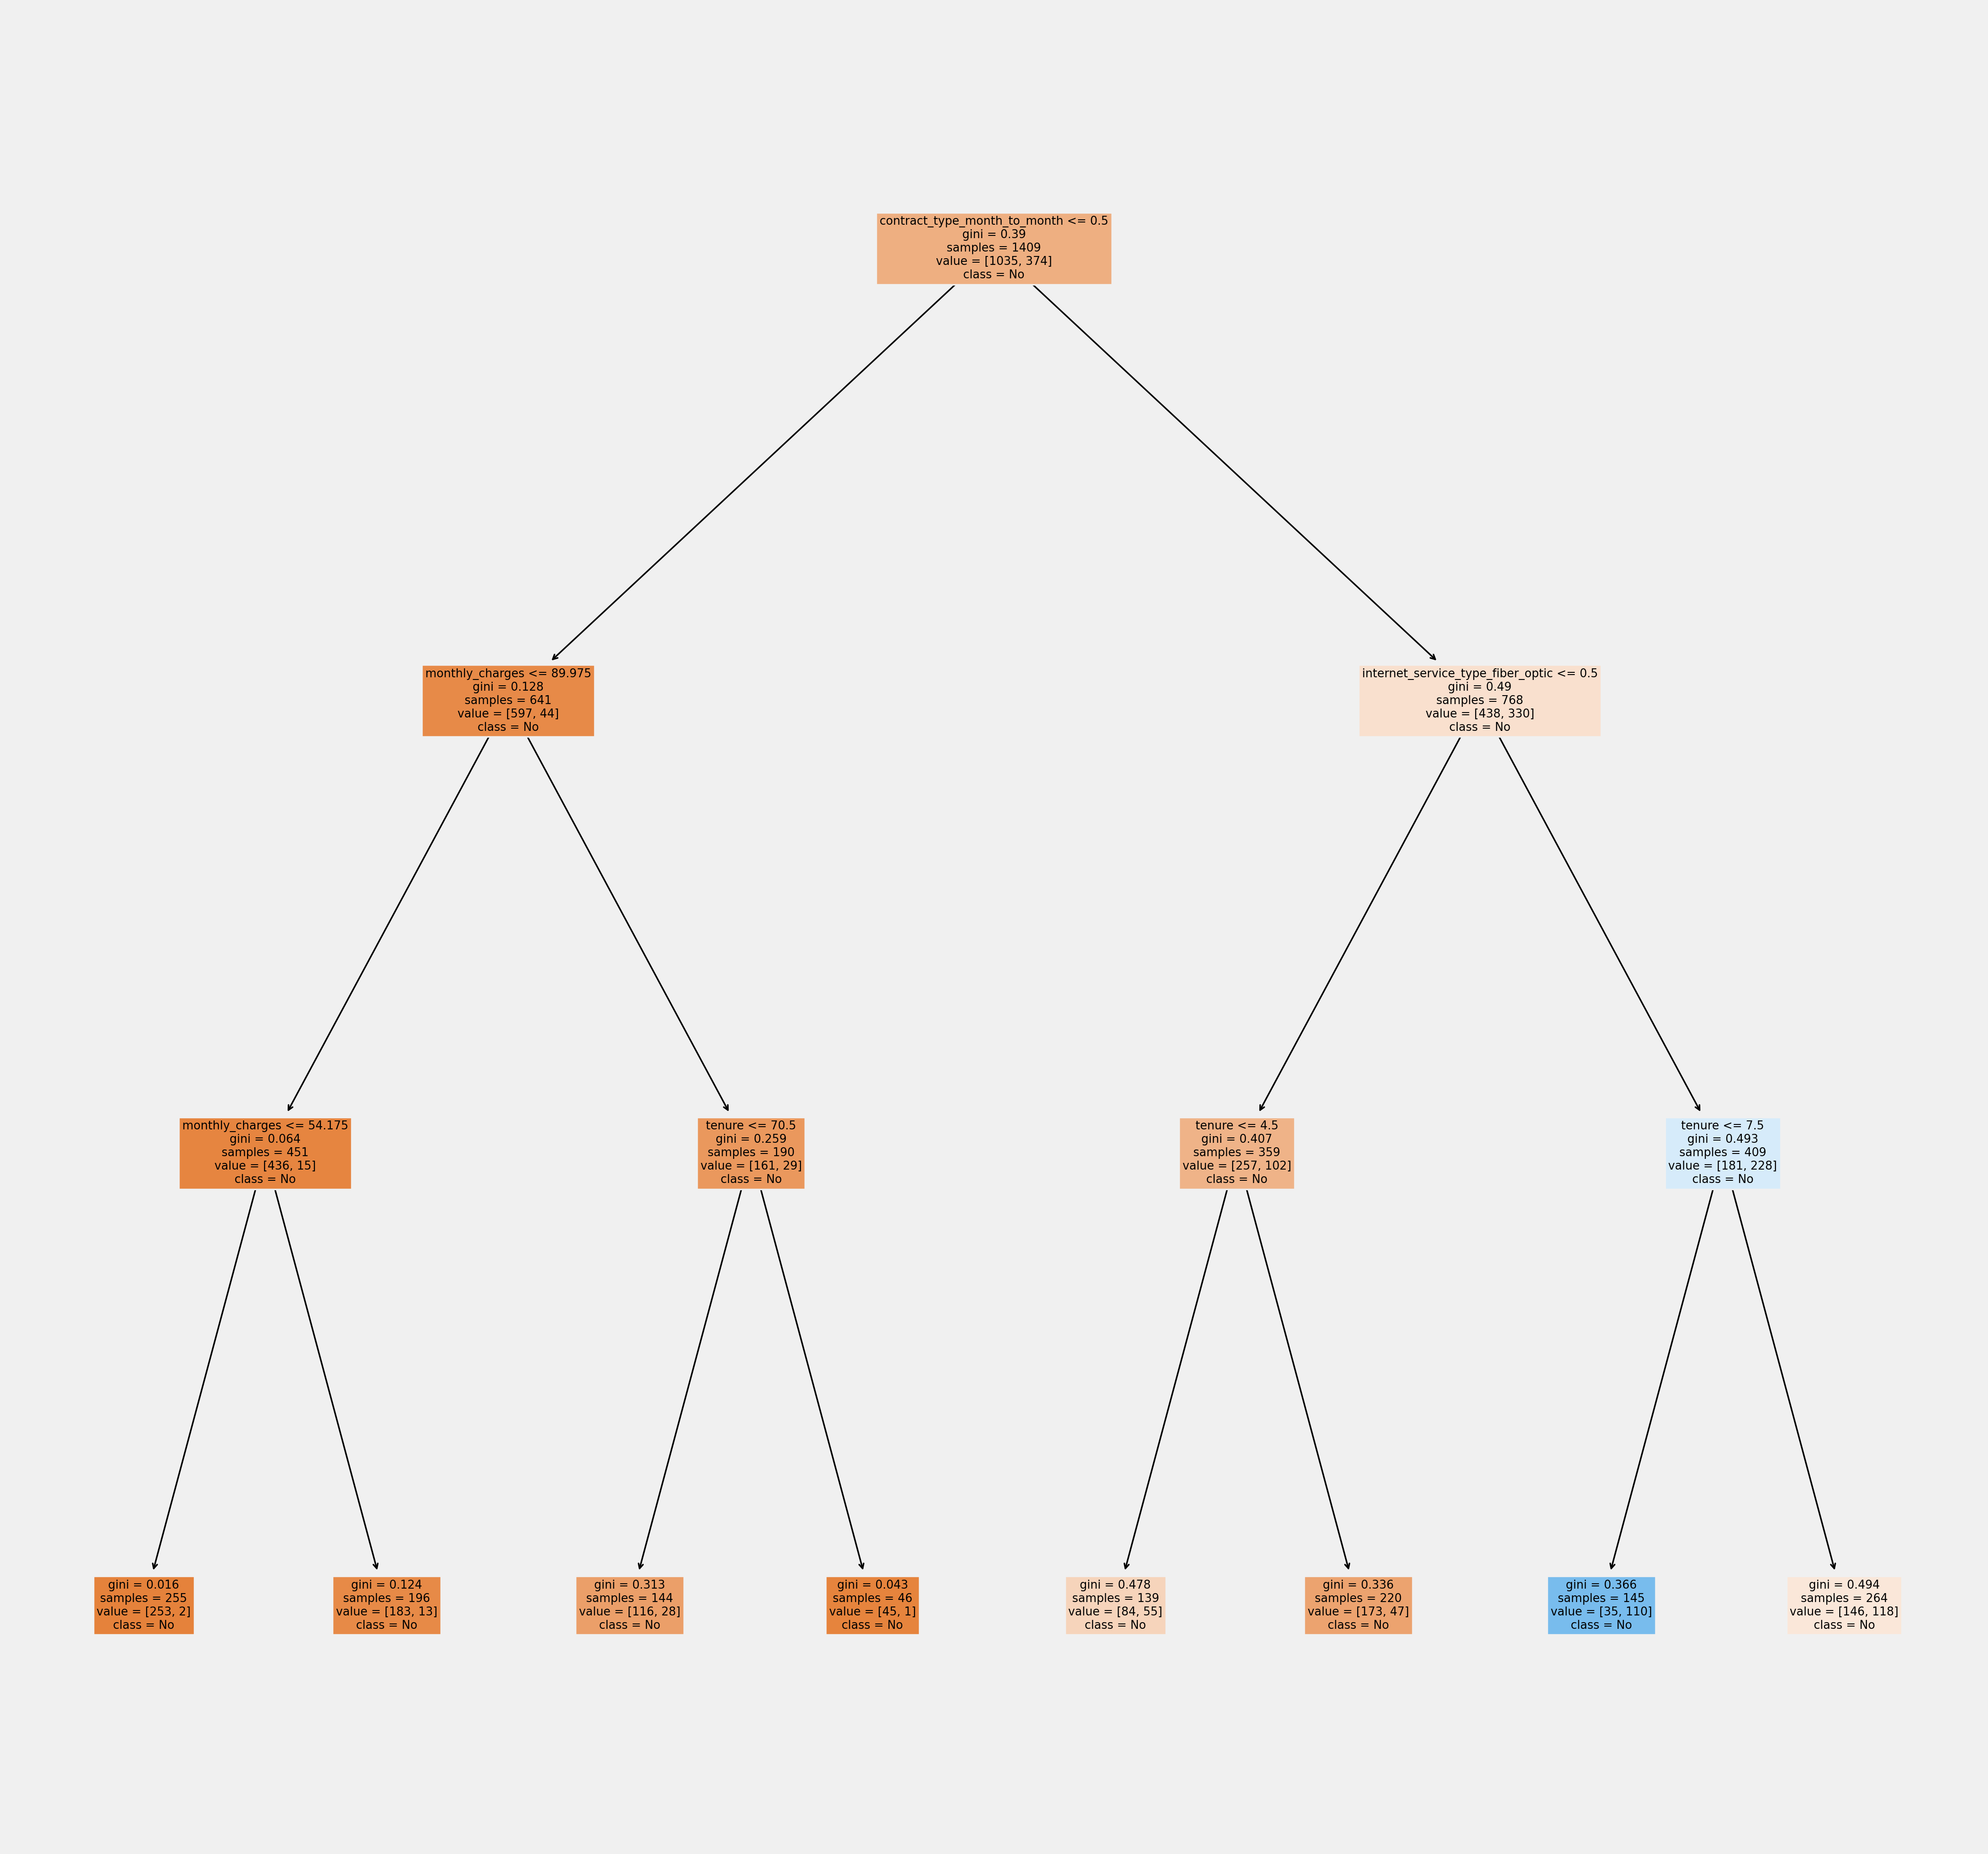

In [51]:
m.decision_tree_compiled(x_train,y_train,train,plot=False)
print('\n')
m.decision_tree_compiled(x_test,y_test,test,plot=True)

## Model 1: Decision Tree Evaluated
### Accuracy
---
- Baseline: .735
- Train: .79
- Validate: .80
- Test: .79



With a train accuracy of .79 and 

## Model 1: K Nearest Neighbor

In [52]:
knn1 = KNeighborsClassifier(n_neighbors=7, weights='uniform')

In [53]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
model3_prediction = knn1.predict(x_train)
model3_probability = knn1.predict_proba(x_train)

model3_prediction_val = knn1.predict(x_val)
model3_probability_val = knn1.predict_proba(x_val)

model3_prediction_test = knn1.predict(x_test)
model3_probability_test = knn1.predict_proba(x_test)

In [55]:
TN, FP, FN, TP = confusion_matrix(y_train, model3_prediction).ravel()
m.get_classification_report(y_train,model3_prediction)

,precision,recall,f1-score,support
0,0.854898,0.919964,0.886238,3311.000000
accuracy,0.826492,0.826492,0.826492,0.826492
weighted avg,0.818909,0.826492,0.819457,4507.000000
macro avg,0.787089,0.743845,0.760409,4507.000000
1,0.719280,0.567726,0.634579,1196.000000


In [56]:
m.metrics(TN, FP, FN, TP)

Accuracy: 0.8264921233636565

True Positive Rate/Sensitivity/Recall/Power: 0.5677257525083612
False Positive Rate/False Alarm Ratio/Fall-out: 0.0800362428269405
True Negative Rate/Specificity/Selectivity: 0.9199637571730594
False Negative Rate/Miss Rate: 0.4322742474916388

Precision/PPV: 0.7192796610169492
F1 Score: 0.6345794392523365

Support (0): 1196
Support (1): 3311


In [57]:
TN, FP, FN, TP = confusion_matrix(y_val, model3_prediction_val).ravel()
print(classification_report(y_val,model3_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test, model3_prediction_test).ravel()
m.get_classification_report(y_test,model3_prediction_test)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       828
           1       0.62      0.48      0.55       299

    accuracy                           0.79      1127
   macro avg       0.73      0.69      0.70      1127
weighted avg       0.77      0.79      0.78      1127



,precision,recall,f1-score,support
0,0.825655,0.883092,0.853408,1035.000000
accuracy,0.777147,0.777147,0.777147,0.777147
weighted avg,0.765582,0.777147,0.769024,1409.000000
macro avg,0.712496,0.683525,0.694455,1409.000000
1,0.599338,0.483957,0.535503,374.000000


## Model 1: KNN Hypertuning for Best Parameters

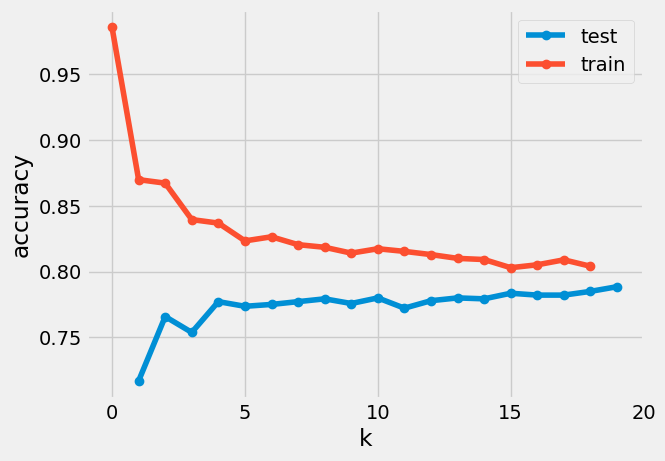

In [58]:
k_range = range(1, 20)
train_scores = []
test_scores = []
for k in k_range:
    knn_loop = KNeighborsClassifier(n_neighbors = k)
    knn_loop.fit(x_train, y_train)
    train_scores.append(knn_loop.score(x_train, y_train))
    test_scores.append(knn_loop.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, test_scores,'o-',train_scores,'o-')
plt.legend(['test','train'])
plt.xticks([0,5,10,15,20])
plt.show()

In [59]:
m.knn_compiled(x_train,y_train,x_test,y_test)

Best fit "n_neighbors" parameter (Determined by GridSearchCV): 28 
--------------------------------------
Train Class Report & Metrics:      
---------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3311
           1       0.97      0.98      0.97      1196

    accuracy                           0.99      4507
   macro avg       0.98      0.98      0.98      4507
weighted avg       0.99      0.99      0.99      4507

Accuracy: 0.985799866873752

True Positive Rate/Sensitivity/Recall/Power: 0.9765886287625418
False Positive Rate/False Alarm Ratio/Fall-out: 0.010872848082150407
True Negative Rate/Specificity/Selectivity: 0.9891271519178496
False Negative Rate/Miss Rate: 0.023411371237458192

Precision/PPV: 0.9700996677740864
F1 Score: 0.9733333333333334

Support (0): 1196
Support (1): 3311
None 

Test Classificiation Report & Metrics:      
--------------------------------------
              precisio